In [1]:
#importing libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score 
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.decomposition import PCA
import string
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

%load_ext autotime

time: 775 µs (started: 2022-05-13 10:39:53 +05:30)


In [2]:
#Reading the test data
Test_data = pd.read_csv("test_file.csv")
Test_data

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,10178,60000,2,2,1,30,0,0,0,0,...,38117,38874,38667,39544,1628,1618,1375,1403,1520,1205
1,5304,200000,2,1,2,29,0,0,0,0,...,76593,93988,50292,10510,4160,14593,20150,0,5739,12050
2,5187,230000,1,1,2,39,0,0,0,0,...,20650,0,0,0,2500,2000,0,0,0,0
3,14495,150000,1,1,2,40,0,0,0,0,...,145978,139791,142745,146872,5800,5245,5200,5200,6500,7200
4,20444,140000,1,2,2,27,0,0,0,0,...,76230,77954,78953,81848,10000,10000,3393,3260,5000,3000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,16413,230000,2,2,1,42,-1,-1,-2,-2,...,0,0,0,0,0,0,0,0,0,0
8996,17210,90000,2,1,2,28,-1,-1,-1,-1,...,7956,499,0,5990,1950,7956,499,0,5990,0
8997,24002,60000,1,2,2,26,0,0,0,0,...,57416,55736,26958,28847,2282,2324,2049,2000,3000,1120
8998,17019,70000,2,2,2,23,0,0,0,0,...,47208,47241,48212,45849,2100,2079,2500,2000,2000,1700


time: 326 ms (started: 2022-05-13 10:39:54 +05:30)


In [3]:
#Reading the train data
Train_data = pd.read_csv("train_file.csv")
Train_data

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,25150,360000,2,2,2,25,-1,-1,-1,-1,...,3435,8870,2020,12590,3479,3446,8870,2020,27043,0
1,13470,240000,2,1,2,46,2,2,-2,-1,...,2240,1681,2267,0,0,2240,0,2267,3074,0
2,3092,320000,2,2,1,41,0,0,0,0,...,35409,35036,35939,5000,2000,2000,3000,3000,1500,0
3,13973,50000,2,2,2,24,-1,-1,-2,-2,...,0,0,0,0,0,0,0,0,0,1
4,10567,80000,1,3,1,52,-1,0,0,0,...,20561,21261,21457,1500,1500,1500,1028,876,1449,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20995,6283,50000,2,2,2,31,1,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
20996,25589,80000,2,2,1,37,0,0,0,0,...,45458,48679,49895,5000,3000,2000,4000,2000,2000,0
20997,4378,100000,1,1,1,52,1,2,2,2,...,23440,28843,31353,0,3600,0,6000,3000,0,1
20998,8604,90000,2,2,1,47,0,0,0,0,...,28747,29177,29452,2000,2000,2000,2000,2000,2000,0


time: 232 ms (started: 2022-05-13 10:39:55 +05:30)


In [4]:
#Shape of the test Data & train Data
print(" Shape of Test data: ",Test_data.shape)
print(" Shape of Train data: ",Train_data.shape)

 Shape of Test data:  (9000, 24)
 Shape of Train data:  (21000, 25)
time: 1.11 ms (started: 2022-05-13 10:39:55 +05:30)


In [5]:
#Information of the test Data
Test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         9000 non-null   int64
 1   LIMIT_BAL  9000 non-null   int64
 2   SEX        9000 non-null   int64
 3   EDUCATION  9000 non-null   int64
 4   MARRIAGE   9000 non-null   int64
 5   AGE        9000 non-null   int64
 6   PAY_0      9000 non-null   int64
 7   PAY_2      9000 non-null   int64
 8   PAY_3      9000 non-null   int64
 9   PAY_4      9000 non-null   int64
 10  PAY_5      9000 non-null   int64
 11  PAY_6      9000 non-null   int64
 12  BILL_AMT1  9000 non-null   int64
 13  BILL_AMT2  9000 non-null   int64
 14  BILL_AMT3  9000 non-null   int64
 15  BILL_AMT4  9000 non-null   int64
 16  BILL_AMT5  9000 non-null   int64
 17  BILL_AMT6  9000 non-null   int64
 18  PAY_AMT1   9000 non-null   int64
 19  PAY_AMT2   9000 non-null   int64
 20  PAY_AMT3   9000 non-null   int64
 21  PAY_AMT4   900

In [6]:
#Information of the train Data
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          21000 non-null  int64
 1   LIMIT_BAL                   21000 non-null  int64
 2   SEX                         21000 non-null  int64
 3   EDUCATION                   21000 non-null  int64
 4   MARRIAGE                    21000 non-null  int64
 5   AGE                         21000 non-null  int64
 6   PAY_0                       21000 non-null  int64
 7   PAY_2                       21000 non-null  int64
 8   PAY_3                       21000 non-null  int64
 9   PAY_4                       21000 non-null  int64
 10  PAY_5                       21000 non-null  int64
 11  PAY_6                       21000 non-null  int64
 12  BILL_AMT1                   21000 non-null  int64
 13  BILL_AMT2                   21000 non-null  int64
 14  BILL_A

In [7]:
#Sum of the Test data's Null values
Test_data.isnull().sum()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
dtype: int64

time: 8.58 ms (started: 2022-05-13 10:39:56 +05:30)


In [8]:
#Sum of the Train data's Null values
Train_data.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default_payment_next_month    0
dtype: int64

time: 6.49 ms (started: 2022-05-13 10:39:56 +05:30)


In [9]:
#Sum of the Test data's NaN values
Test_data.isna().sum()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
dtype: int64

time: 6.09 ms (started: 2022-05-13 10:39:57 +05:30)


In [10]:
#Sum of the Train data's NaN values
Train_data.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default_payment_next_month    0
dtype: int64

time: 5.25 ms (started: 2022-05-13 10:39:57 +05:30)


In [11]:
#Unique length of the test Data
Test_data.nunique()

ID           9000
LIMIT_BAL      74
SEX             2
EDUCATION       7
MARRIAGE        4
AGE            53
PAY_0          11
PAY_2          10
PAY_3          11
PAY_4          10
PAY_5           9
PAY_6           9
BILL_AMT1    7606
BILL_AMT2    7464
BILL_AMT3    7367
BILL_AMT4    7235
BILL_AMT5    7141
BILL_AMT6    6975
PAY_AMT1     3487
PAY_AMT2     3462
PAY_AMT3     3369
PAY_AMT4     3075
PAY_AMT5     3006
PAY_AMT6     3010
dtype: int64

time: 12.8 ms (started: 2022-05-13 10:39:57 +05:30)


In [12]:
#Unique length of the train Data
Train_data.nunique()

ID                            21000
LIMIT_BAL                        78
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              55
PAY_0                            11
PAY_2                            11
PAY_3                            11
PAY_4                            10
PAY_5                            10
PAY_6                            10
BILL_AMT1                     16700
BILL_AMT2                     16332
BILL_AMT3                     16142
BILL_AMT4                     15785
BILL_AMT5                     15400
BILL_AMT6                     15102
PAY_AMT1                       6336
PAY_AMT2                       6304
PAY_AMT3                       5964
PAY_AMT4                       5547
PAY_AMT5                       5486
PAY_AMT6                       5519
default_payment_next_month        2
dtype: int64

time: 12 ms (started: 2022-05-13 10:39:58 +05:30)


In [13]:
#Checking for duplicates in train data & test data
print(" Duplicates for Train data: ",Train_data.duplicated().sum())
print(" Duplicates for Test data: ",Test_data.duplicated().sum())

 Duplicates for Train data:  0
 Duplicates for Test data:  0
time: 79.7 ms (started: 2022-05-13 10:39:58 +05:30)


In [14]:
#Describing the Train data
Train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,21000.0,14949.183667,8632.775153,1.0,7508.75,14939.5,22386.75,29998.0
LIMIT_BAL,21000.0,167214.746667,128965.188482,10000.0,50000.00,140000.0,240000.00,800000.0
SEX,21000.0,1.607571,0.488303,1.0,1.00,2.0,2.00,2.0
EDUCATION,21000.0,1.854190,0.791628,0.0,1.00,2.0,2.00,6.0
MARRIAGE,21000.0,1.551714,0.521176,0.0,1.00,2.0,2.00,3.0
AGE,21000.0,35.461619,9.206628,21.0,28.00,34.0,41.00,75.0
PAY_0,21000.0,-0.011190,1.123210,-2.0,-1.00,0.0,0.00,8.0
PAY_2,21000.0,-0.127238,1.198957,-2.0,-1.00,0.0,0.00,8.0
PAY_3,21000.0,-0.164857,1.198624,-2.0,-1.00,0.0,0.00,8.0
PAY_4,21000.0,-0.218190,1.172210,-2.0,-1.00,0.0,0.00,8.0


time: 160 ms (started: 2022-05-13 10:39:58 +05:30)


In [15]:
#Unique length of the labels in EDUCATION & MARRIAGE column before merging labels
print(" Train data unique values for EDUCATION column: ",Train_data['EDUCATION'].unique())
print(" Test data unique values for EDUCATION column: ",Test_data['EDUCATION'].unique())
print(" Train data unique values for MARRIAGE column:: ", Train_data['MARRIAGE'].unique())
print(" Train data unique values for MARRIAGE column: ", Test_data['MARRIAGE'].unique())

 Train data unique values for EDUCATION column:  [2 1 3 5 4 6 0]
 Test data unique values for EDUCATION column:  [2 1 3 5 4 6 0]
 Train data unique values for MARRIAGE column::  [2 1 3 0]
 Train data unique values for MARRIAGE column:  [1 2 3 0]
time: 3.86 ms (started: 2022-05-13 10:39:58 +05:30)


In [16]:
Train_data[Train_data['PAY_0'] == -2]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
5,28050,150000,2,1,2,29,-2,-2,-2,-2,...,987,0,14001,5067,131,987,400,14001,0,1
17,8880,180000,2,2,1,26,-2,-2,-2,-2,...,174825,140909,177257,272817,7017,8201,8246,186732,8000,0
18,1775,120000,2,1,2,28,-2,-2,-2,-2,...,409,872,1539,2054,0,409,872,1539,580,0
38,17529,370000,2,2,2,40,-2,-1,0,0,...,188960,195476,184094,191446,7002,6854,15960,0,122400,0
50,19476,200000,2,2,1,47,-2,-2,-2,-2,...,0,2244,66000,0,5738,1626,2244,66000,30000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20961,16156,300000,2,2,1,43,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,520,1
20975,18961,200000,2,1,2,29,-2,-2,-2,-2,...,-792,-792,69708,0,792,0,0,70500,1688,1
20976,28140,520000,2,1,1,37,-2,-2,-2,-2,...,2310,12000,0,3913,7494,2310,12000,0,0,0
20977,21759,80000,2,1,2,24,-2,-2,-2,-2,...,967,5762,0,698,4949,967,5775,0,0,0


time: 18.2 ms (started: 2022-05-13 10:39:59 +05:30)


In [17]:
Train_data[Train_data['PAY_2'] == -2]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
5,28050,150000,2,1,2,29,-2,-2,-2,-2,...,987,0,14001,5067,131,987,400,14001,0,1
17,8880,180000,2,2,1,26,-2,-2,-2,-2,...,174825,140909,177257,272817,7017,8201,8246,186732,8000,0
18,1775,120000,2,1,2,28,-2,-2,-2,-2,...,409,872,1539,2054,0,409,872,1539,580,0
44,22999,150000,2,4,3,49,1,-2,-1,-1,...,10410,2361,2868,4,7920,10426,0,2868,4384,0
47,18807,170000,2,3,2,31,1,-2,-2,-2,...,0,150,167,0,0,0,150,167,2578,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20976,28140,520000,2,1,1,37,-2,-2,-2,-2,...,2310,12000,0,3913,7494,2310,12000,0,0,0
20977,21759,80000,2,1,2,24,-2,-2,-2,-2,...,967,5762,0,698,4949,967,5775,0,0,0
20978,24652,150000,1,1,1,36,-2,-2,-2,-2,...,1213,26636,2547,2424,27498,1213,26636,2704,1800,0
20995,6283,50000,2,2,2,31,1,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0


time: 13 ms (started: 2022-05-13 10:39:59 +05:30)


In [18]:
#MARRIAGE columns having 0 lablels
Train_data[Train_data['MARRIAGE'] == 0]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
439,23030,80000,2,3,0,37,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
1068,3057,200000,1,3,0,36,-2,-2,-2,-2,...,41359,9140,0,89187,14178,41359,9140,0,0,0
1476,219,110000,2,3,0,31,0,0,0,0,...,73315,63818,63208,4000,5000,3000,3000,3000,8954,0
1624,10209,50000,2,1,0,45,-1,-1,-2,-2,...,0,4881,4634,0,0,0,4881,0,0,0
1766,7941,50000,1,3,0,50,0,0,0,0,...,13256,14437,16985,1500,1500,1400,1400,2800,0,0
2282,20450,120000,1,3,0,26,0,0,-1,-1,...,13781,8636,5698,13160,5272,13832,8661,5715,38852,0
2357,29079,100000,2,3,0,56,1,2,0,0,...,31134,30444,32460,0,1500,2700,0,2400,0,0
2646,9089,50000,1,3,0,50,0,0,0,-1,...,3400,2769,0,2266,0,3400,2769,1700,0,0
3975,12079,30000,2,3,0,46,1,2,2,2,...,21542,24022,25473,0,3000,0,3000,2000,0,0
4204,5346,50000,2,2,0,28,1,2,0,0,...,46677,47668,50764,0,3154,1669,1741,3900,0,0


time: 21.6 ms (started: 2022-05-13 10:39:59 +05:30)


In [19]:
def merging_labels():
    
    """
    input: takes original labels from the data

    output: merges unwanted or similar labels into one label in the data
    
    """
    #Merging unknown and others label of education column into one label from Train data & Test data
    Train_data['EDUCATION']=np.where(Train_data['EDUCATION'] == 5, 4, Train_data['EDUCATION'])
    Train_data['EDUCATION']=np.where(Train_data['EDUCATION'] == 6, 4, Train_data['EDUCATION'])
    Train_data['EDUCATION']=np.where(Train_data['EDUCATION'] == 0, 4, Train_data['EDUCATION'])
    Test_data['EDUCATION']=np.where(Test_data['EDUCATION'] == 5, 4, Test_data['EDUCATION'])
    Test_data['EDUCATION']=np.where(Test_data['EDUCATION'] == 6, 4, Test_data['EDUCATION'])
    Test_data['EDUCATION']=np.where(Test_data['EDUCATION'] == 0, 4, Test_data['EDUCATION'])
    
    #Merging divorced and others label of MARRIAGE column into one label from Train data and Test data
    #Train_data['MARRIAGE']=np.where(Train_data['MARRIAGE'] == 0, Train_data['MARRIAGE'] )
    #Test_data['MARRIAGE']=np.where(Test_data['MARRIAGE'] == 0,  Test_data['MARRIAGE'])
    
    
    # After merging, the Unique length of the test Data
    print(" Train data unique values for EDUCATION column: ",Train_data['EDUCATION'].unique())
    print(" Test data unique values for EDUCATION column: ",Test_data['EDUCATION'].unique())
    #print(" Train data unique values for MARRIAGE column: ",Train_data['MARRIAGE'].unique())
    #print(" Test data unique values for MARRIAGE column: ",Test_data['MARRIAGE'].unique())

time: 1.13 ms (started: 2022-05-13 10:39:59 +05:30)


In [20]:
 merging_labels()

 Train data unique values for EDUCATION column:  [2 1 3 4]
 Test data unique values for EDUCATION column:  [2 1 3 4]
time: 6.63 ms (started: 2022-05-13 10:40:00 +05:30)


In [21]:
def Features_Freq():
    
    """
    Gives Frequency Distribution of all the Features in the data
    
    """

    #Histogram for all the columns
    hist_num = Train_data[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4','PAY_5', 'PAY_6', 
                'BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
                'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6' ]]
    #ax = hist_num.hist(figsize=(15,15))
    #f, axes = plt.subplots(6, 3,  sharex=True, sharey=True, figsize=(20, 20), facecolor='white')
    #f.suptitle('Frequency Distribution of Features', x=0.5, y=1.05, ha='center', fontsize='xx-large')
    #plt.suptitle('Frequency Distribution of Features', x=0.5, y=1.05, ha='center', fontsize='xx-large')
    for x in hist_num:

        sns.histplot(x=x, data=hist_num, kde = True, bins = 20)
        plt.suptitle("{}\n  min = {} ; max = {}\n mean={} ; std_dev={}".format(x, Train_data[x].min(),Train_data[x].max(),round(Train_data[x].mean()),round(Train_data[x].std())), x=0.5, y=1.0, ha='center', va = 'center')
        plt.show()

time: 2.25 ms (started: 2022-05-13 10:40:00 +05:30)


### We can observe that there is highest frequencies in Repayment status, Amount of bill statement and Amount of previous payment

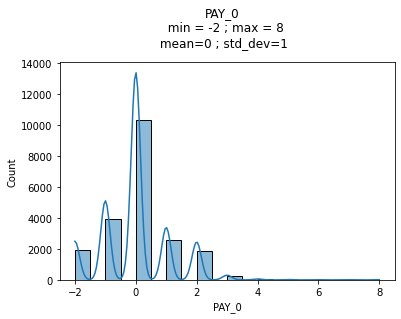

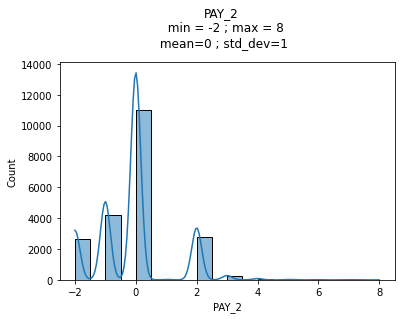

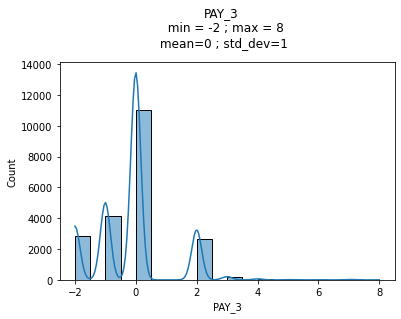

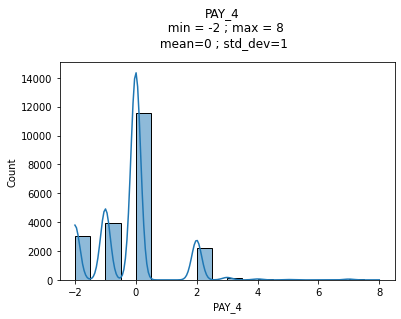

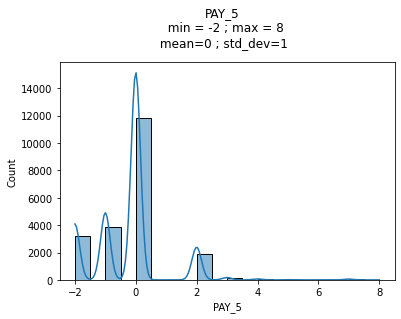

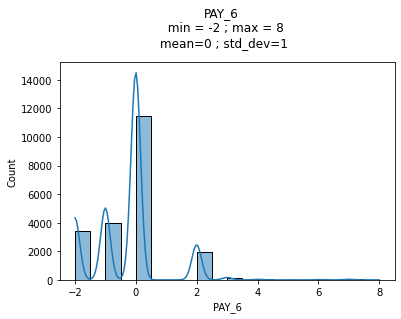

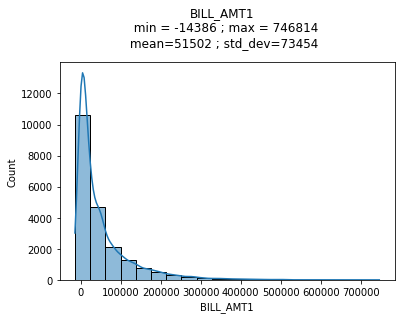

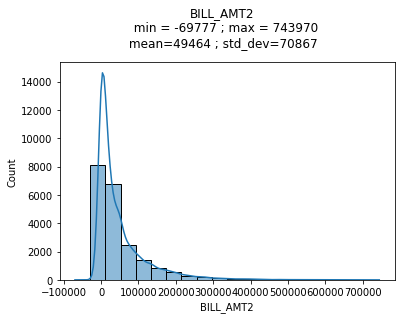

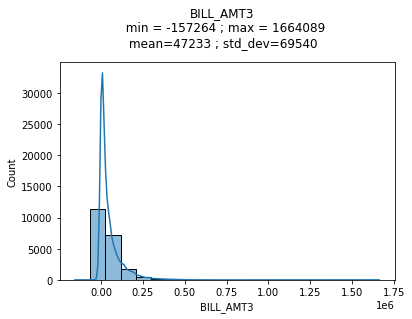

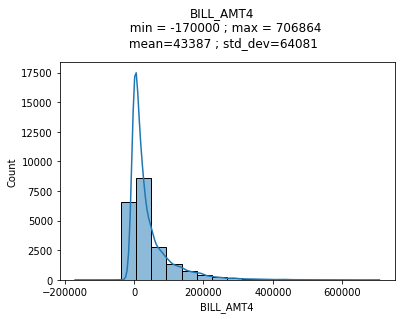

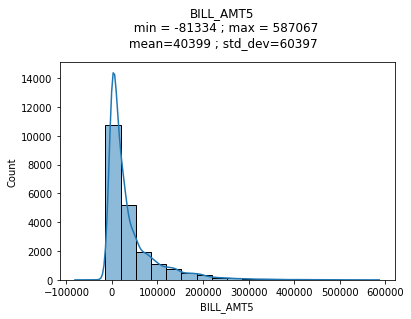

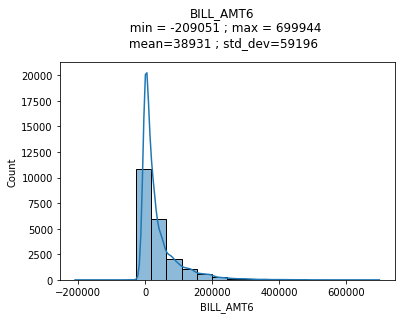

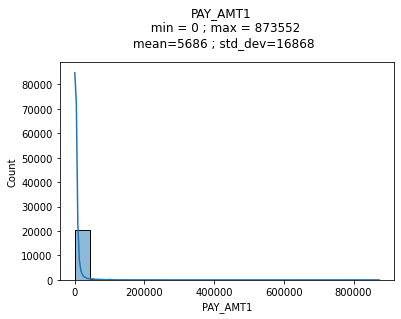

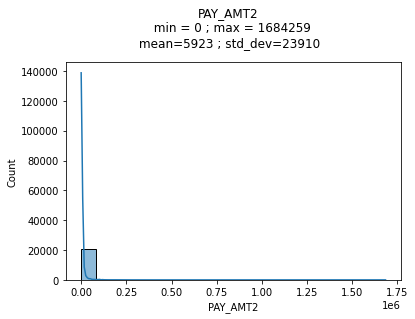

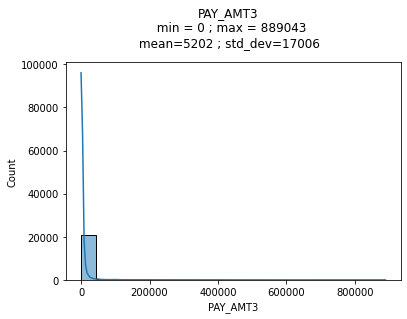

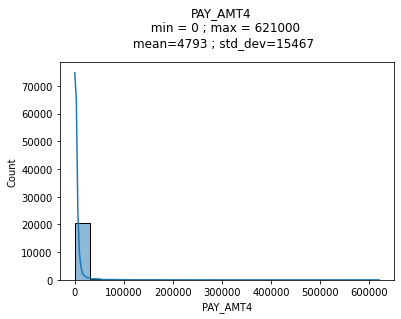

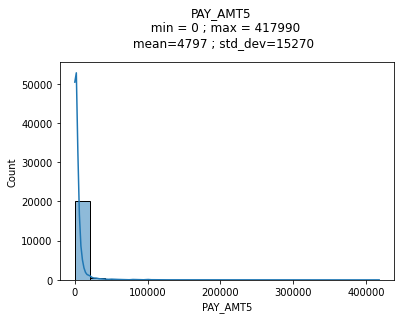

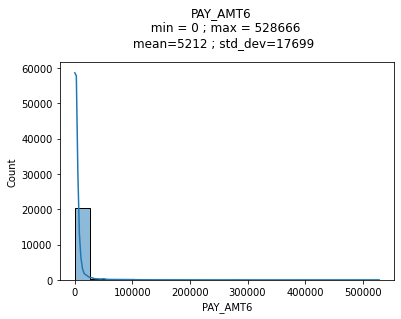

time: 3.67 s (started: 2022-05-12 16:05:44 +05:30)


In [22]:
Features_Freq()

In [23]:
def Categorical_Plot():
    
    """
    returns count plot of categorical variables
    
    """
    
    # Creating a new dataframe with categorical variables
    subset = Train_data[['default_payment_next_month', 'SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 
               'PAY_5', 'PAY_6']]
    
    #plt.subplots(3, 3, figsize=(20, 15), facecolor='white')
    #f.suptitle('FREQUENCY OF CATEGORICAL VARIABLES)')
    plt.title('FREQUENCY OF CATEGORICAL VARIABLES',  x=0.5, y=1.65, ha='center', va = 'center',fontsize='xx-large', fontweight = 'bold' )
        
    for x in subset:
        ax = sns.countplot(x=x, data=subset, palette="seismic_r")
        #plt.suptitle('Value counts: \n{}'.format(Train_data[x].value_counts(normalize = True)))
        plt.suptitle('Value counts: \n{}'.format(Train_data[x].value_counts()), x=0.5, y=1.20, ha='center', va = 'center')
        #plt.figure(figsize = (10,6))
        # The frequency of defaults
       # compute percentage of each format
    
        total=len(Train_data[x])
        for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_height()/total)
            x = p.get_x() + p.get_width() / 2 - 0.05
            y = p.get_y() + p.get_height()
            ax.annotate(percentage, (x, y), size = 12 ,horizontalalignment='center',
        verticalalignment='bottom' )
            #percentage ='{:,.1f}%'.format(p.get_width())
            #width, height =p.get_width(),p.get_height()
            #x=p.get_x()+width+0.02
            #y=p.get_y()+height/2
            #ax.annotate(percentage,(x,y))
 

        plt.show()

time: 1.13 ms (started: 2022-05-12 16:05:47 +05:30)


### We can see that in the default payment column there are 78% credit card users those who are not expected to default payment whereas 22% credit card users  are expected to default the payment.

###  We can see that in the sex column there is higher ratio of females then males

### We can observe that in education column university has the high percentage

###  We can observe that in marraige column singles have the higher percentage 

### We can observe that Repayment status for all months have highest users whose payment is delayed for two months.


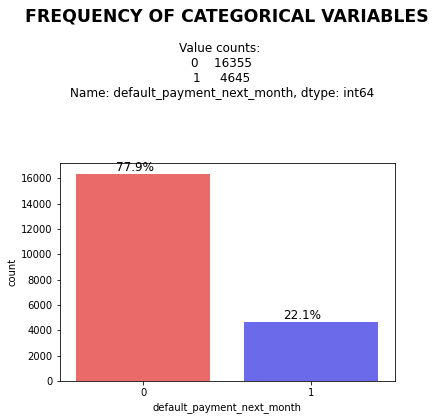

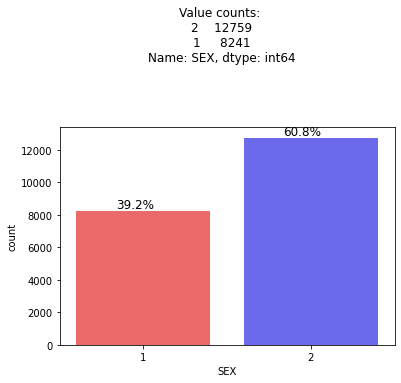

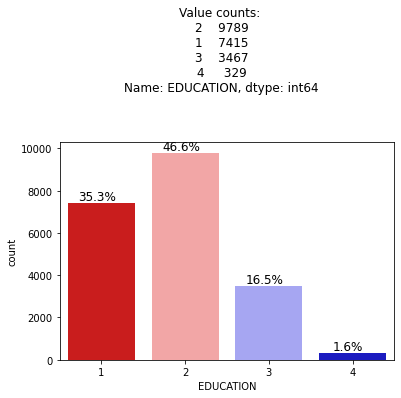

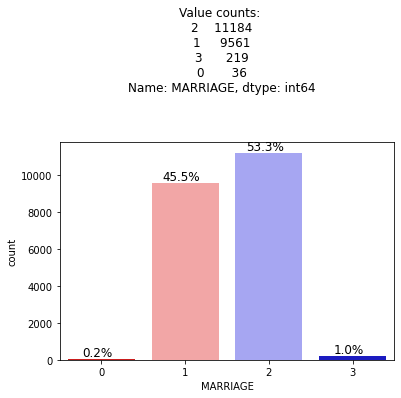

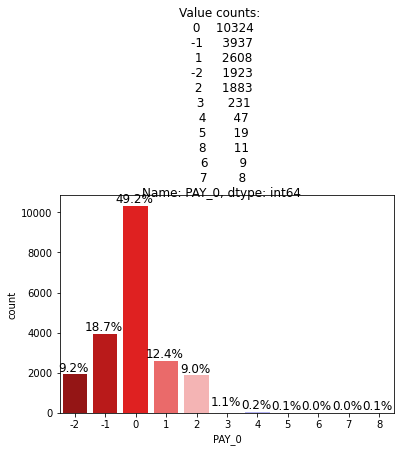

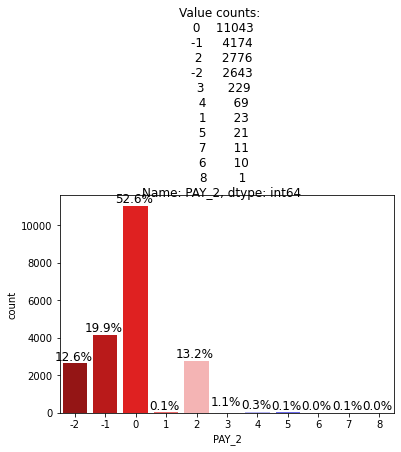

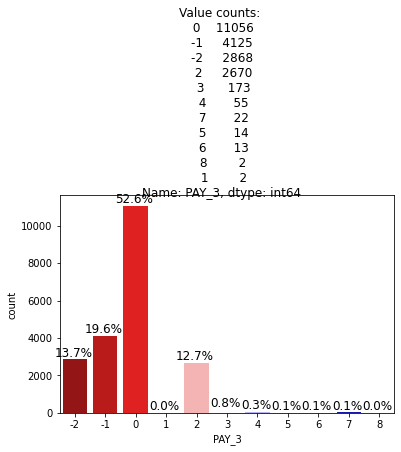

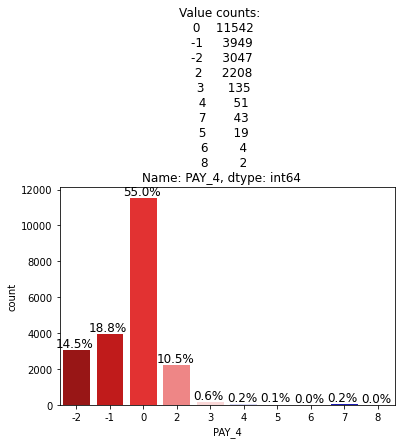

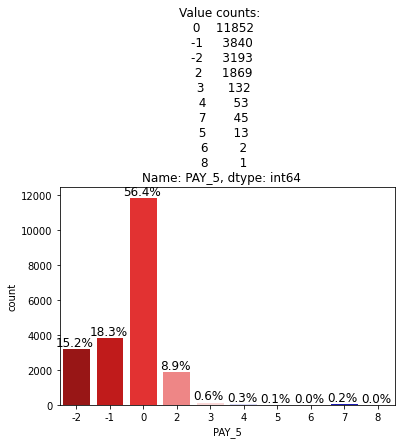

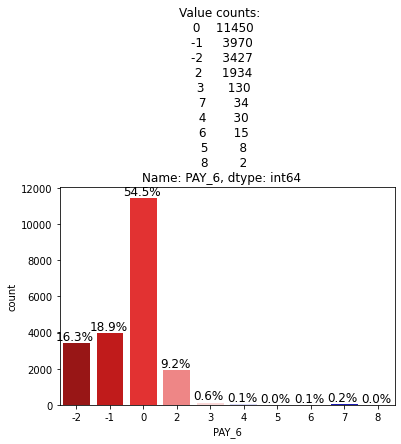

time: 1.51 s (started: 2022-05-10 17:01:32 +05:30)


In [71]:
Categorical_Plot()

In [25]:
def CategoricalHue_Plot():
    
    """
    returns count plot of categorical variables
    
    """
    
    # Creating a new dataframe with categorical variables
    subset = Train_data[['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 
               'PAY_5', 'PAY_6', 'default_payment_next_month']]
    plt.title('FREQUENCY OF CATEGORICAL VARIABLES (BY TARGET)',  x=0.5, y=1.65, ha='center', va = 'center',fontsize='xx-large', fontweight = 'bold' )
    
    for x1 in subset:

        #plt.title('FREQUENCY OF CATEGORICAL VARIABLES (BY TARGET)' , x=0.5, y=1.05, ha='center', fontsize='xx-large')
        ax = sns.countplot(x=x1, hue="default_payment_next_month", data=subset, palette="seismic_r")
        #plt.suptitle('Value counts: \n{}'.format(Train_data[x].value_counts(normalize = True)))
        plt.suptitle('Value counts: \n{}'.format(Train_data[x1].value_counts()), x=0.5, y=1.20, ha='center', va = 'center')
        #plt.figure(figsize = (10,6))
        total=len(Train_data[x1])
        for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_height()/total)
            x = p.get_x() + p.get_width() / 2 - 0.05
            y = p.get_y() + p.get_height()
            ax.annotate(percentage, (x, y), size = 12 ,horizontalalignment='center',
        verticalalignment='bottom' )
        plt.show()
        #print('Observations: abc \n{}'.subset['sex'])

time: 1.26 ms (started: 2022-05-09 19:09:40 +05:30)


### By Plotting frequency of categorical variables with reference to default payments, we observe that the there are more number of non-defaulters frequency 

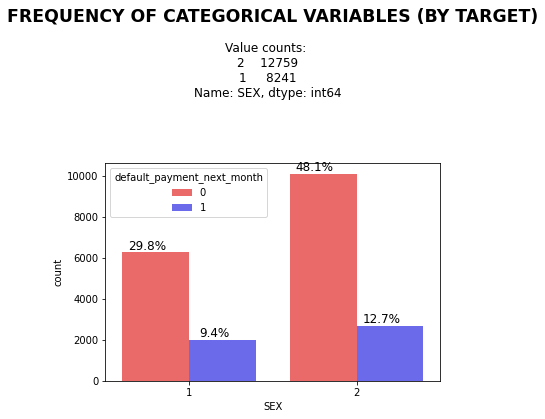

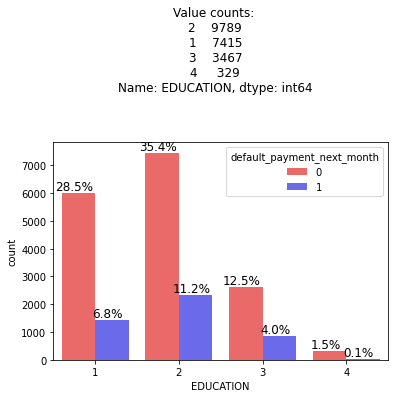

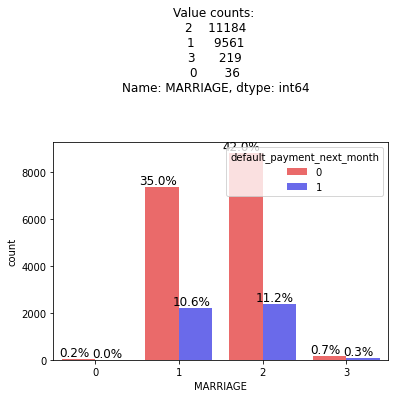

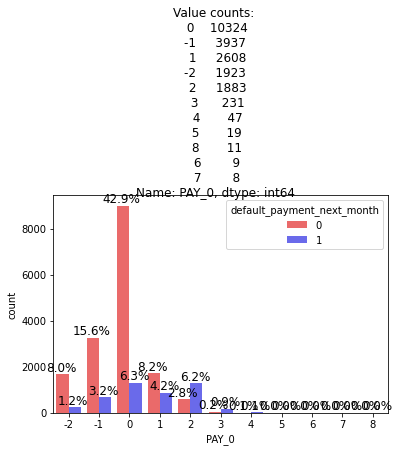

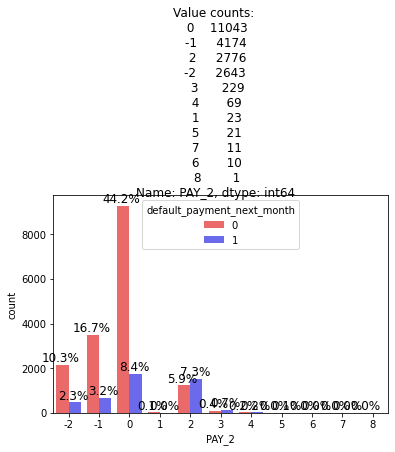

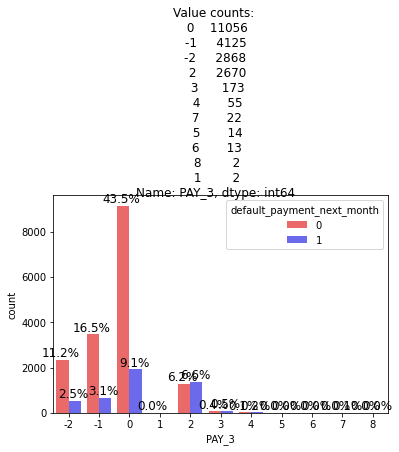

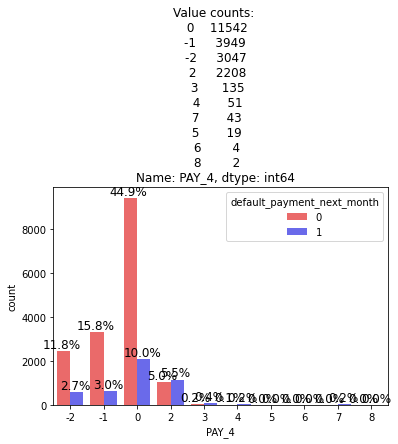

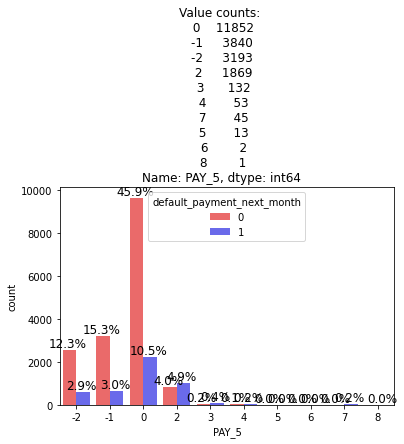

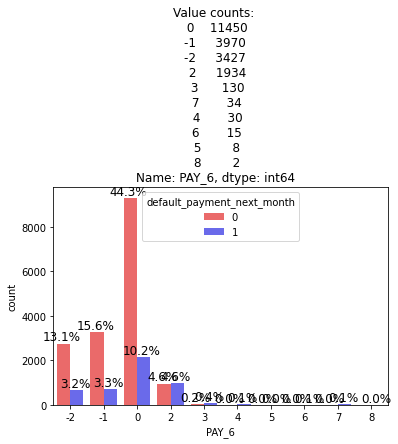

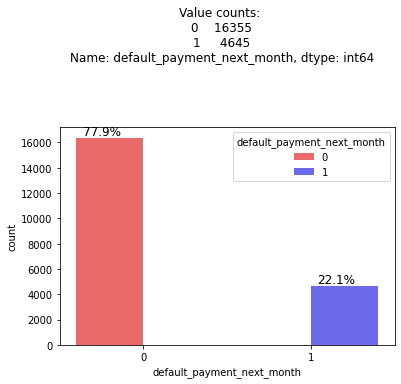

time: 2.02 s (started: 2022-05-09 16:36:31 +05:30)


In [26]:
CategoricalHue_Plot()

### By Plotting histogram of Amount of given credit (NT dollars) with reference to default payments, we observe that the there are more number of non-defaulters frequency for Limit Balance

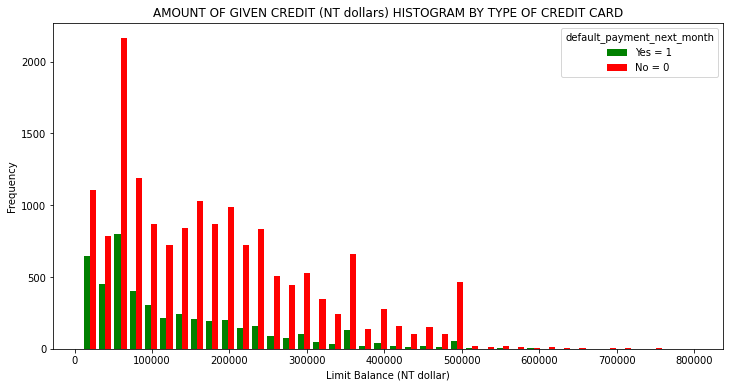

time: 230 ms (started: 2022-05-09 16:36:33 +05:30)


In [27]:
#Defining x1 & y1 for 1 & 0 for Default payment with refrence to Amount of given credit (NT dollars)
x1 = Train_data[Train_data['default_payment_next_month'] == 1]['LIMIT_BAL']
x2 = Train_data[Train_data['default_payment_next_month'] == 0]['LIMIT_BAL']

plt.figure(figsize=(12,6))
plt.hist([x1, x2], bins = 40, color=['Green', 'Red'])
#plt.xlim([0,600000])
plt.legend(['Yes = 1', 'No = 0'], title = 'default_payment_next_month', loc='upper right', facecolor='white')
plt.xlabel('Limit Balance (NT dollar)')
plt.ylabel('Frequency')
plt.title('AMOUNT OF GIVEN CREDIT (NT dollars) HISTOGRAM BY TYPE OF CREDIT CARD')
plt.show()

In [28]:
def Density():
    
    plt.subplots(figsize=(20,5))
    plt.subplot(121)
    sns.distplot(Train_data.LIMIT_BAL, bins = 20, color="brown")

    plt.subplot(122)
    sns.distplot(Train_data.AGE, bins = 20, color="Green")

    plt.show()

time: 618 µs (started: 2022-05-09 16:36:33 +05:30)


###  By plotting the continous variables density plot, we observe that the  dataset consists of skewed data of limiting balance and age of the credit card users.

/home/rutvathaker/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/rutvathaker/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


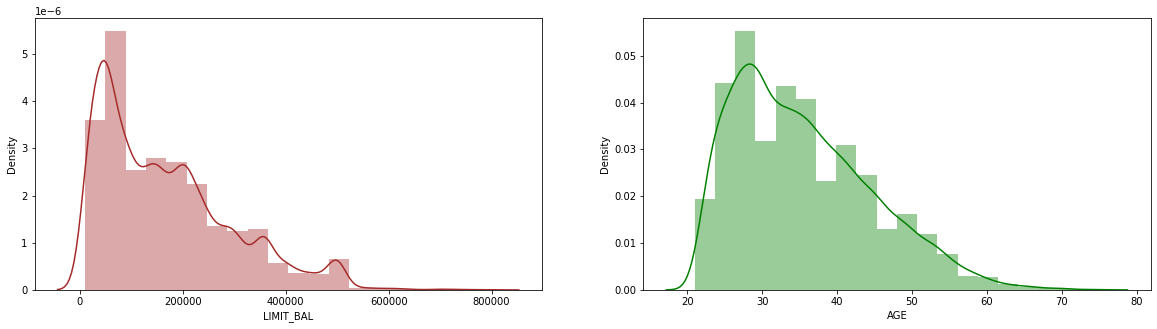

time: 508 ms (started: 2022-05-09 16:36:33 +05:30)


In [29]:
Density()

### We can observe that both positive and negative value decreases simultaneously with refrence to defaulter and non-defaulter, here also the negative value depicts that there are outliers. Repayment status in September has the highest positive value that are defaulters while Repayment status in April has the highest negative value that are non-defaulters  having  more outliers 

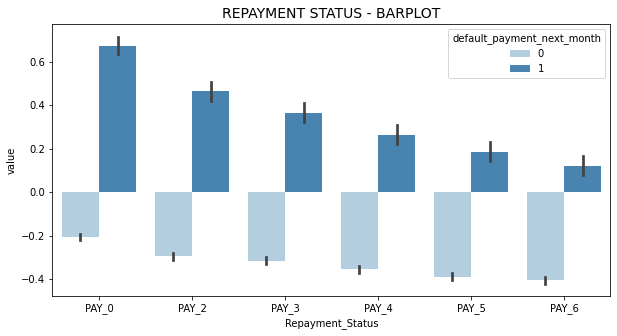

time: 1.5 s (started: 2022-05-09 16:36:33 +05:30)


In [30]:
#Visualizing the repayment status ith reference to default payment
Repayments = Train_data[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'default_payment_next_month']]
Repayment = pd.melt(Repayments,id_vars="default_payment_next_month",
                    var_name="Repayment_Status",
                    value_name='value')

plt.figure(figsize=(10,5))
ax = sns.barplot(y="value", x="Repayment_Status", hue="default_payment_next_month", data=Repayment, palette='Blues')
plt.title('REPAYMENT STATUS - BARPLOT', size=14)
plt.show()

In [27]:
#setting ID as index 
Train_data.set_index('ID',inplace=True)
Test_data.set_index('ID',inplace=True)

time: 2.34 ms (started: 2022-05-10 11:32:24 +05:30)


### Limit Balance and default payment categories are highly correlated

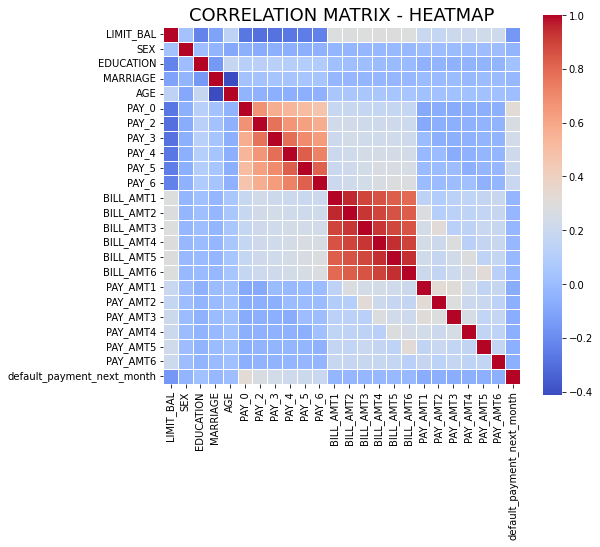

time: 675 ms (started: 2022-05-09 15:13:30 +05:30)


In [32]:
#Correlations matrix
corr = Train_data.corr() 
f,ax = plt.subplots(figsize=(8, 7))
sns.heatmap(corr, cbar = True,  square = True, annot = False, 
            xticklabels= True, yticklabels= True
            ,cmap="coolwarm", linewidths=.5, ax=ax)
plt.title('CORRELATION MATRIX - HEATMAP', size=18);

## Base Model

### Highest Accuracy is observed in KNN Model (78%) and lowest accuracy is observed in Decision Tree Model

In [33]:
#Defining x & y
X = Train_data.iloc[:, :-1] 
y = Train_data['default_payment_next_month']
print(X.shape, y.shape)

(21000, 23) (21000,)
time: 6.33 ms (started: 2022-05-06 16:26:01 +05:30)


In [34]:
#Splitting the data
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(16800, 23) (16800,)
(4200, 23) (4200,)
time: 14.5 ms (started: 2022-05-06 16:26:01 +05:30)


### Logistic Regression

In [35]:
#Fitting the Model
lr = LogisticRegression()
l_r = lr.fit(X_train, y_train)

time: 244 ms (started: 2022-05-06 16:26:02 +05:30)


/home/rutvathaker/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [36]:
#Predicting the test set result
y_pred_test = l_r.predict(X_test)

time: 7.39 ms (started: 2022-05-06 16:26:03 +05:30)


In [37]:
#accessing confusion matrix
c_matrix_test = confusion_matrix(y_test, y_pred_test)
print("Testing confusion matrix:", c_matrix_test)

Testing confusion matrix: [[3263    1]
 [ 936    0]]
time: 6.55 ms (started: 2022-05-06 16:26:04 +05:30)


In [38]:
#Accuracy score of the model
#print("\nTraining Accuracy score:",accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",accuracy_score(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))

Testing Accuracy score: 0.7769047619047619
              precision    recall  f1-score   support

           0       0.78      1.00      0.87      3264
           1       0.00      0.00      0.00       936

    accuracy                           0.78      4200
   macro avg       0.39      0.50      0.44      4200
weighted avg       0.60      0.78      0.68      4200

time: 15.4 ms (started: 2022-05-06 16:26:04 +05:30)


### SVM

In [39]:
#Implementing SVM through SVC
svc=SVC(random_state=0)
svc.fit(X_train,y_train)

SVC(random_state=0)

time: 10.3 s (started: 2022-05-06 16:26:05 +05:30)


In [40]:
#Predicting the test set result
predict=svc.predict(X_test)

time: 1.86 s (started: 2022-05-06 16:26:57 +05:30)


In [41]:
#Creating confusion matrix
c_matrix_test = confusion_matrix(y_test, predict)
print("Testing confusion matrix:", c_matrix_test)

Testing confusion matrix: [[3264    0]
 [ 936    0]]
time: 8.21 ms (started: 2022-05-06 16:26:59 +05:30)


In [42]:
#Accuracy Score of the model
print("Testing Accuracy score:",accuracy_score(y_test, predict))
print(classification_report(y_test, predict))

Testing Accuracy score: 0.7771428571428571
              precision    recall  f1-score   support

           0       0.78      1.00      0.87      3264
           1       0.00      0.00      0.00       936

    accuracy                           0.78      4200
   macro avg       0.39      0.50      0.44      4200
weighted avg       0.60      0.78      0.68      4200

time: 19.4 ms (started: 2022-05-06 16:27:00 +05:30)


/home/rutvathaker/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/rutvathaker/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/rutvathaker/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Decision Tree

In [43]:
#Fitting Decision Tree classifier to the training set  
classifier= DecisionTreeClassifier(random_state=0)  
classifier.fit(X_train, y_train)  

DecisionTreeClassifier(random_state=0)

time: 350 ms (started: 2022-05-06 16:27:03 +05:30)


In [44]:
#Predicting the test set result  
y_DTpredict= classifier.predict(X_test)  

time: 9.88 ms (started: 2022-05-06 16:27:04 +05:30)


In [45]:
#Evaluating the algorithm
print(confusion_matrix(y_test,y_DTpredict))
print("Testing Accuracy score:",accuracy_score(y_test, y_DTpredict))
print(classification_report(y_test,y_DTpredict))

[[2688  576]
 [ 560  376]]
Testing Accuracy score: 0.7295238095238096
              precision    recall  f1-score   support

           0       0.83      0.82      0.83      3264
           1       0.39      0.40      0.40       936

    accuracy                           0.73      4200
   macro avg       0.61      0.61      0.61      4200
weighted avg       0.73      0.73      0.73      4200

time: 20.5 ms (started: 2022-05-06 16:27:05 +05:30)


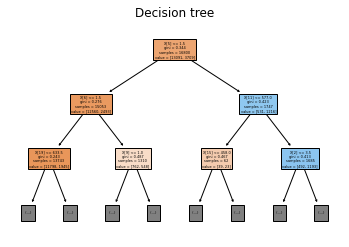

time: 510 ms (started: 2022-05-06 16:27:06 +05:30)


In [46]:
#Plotting Decision Tree
plt.figure()
plot_tree(classifier, filled=True, max_depth=2)
plt.title("Decision tree")
plt.show()

### Decision Tree using entropy

[[2681  583]
 [ 549  387]]
Testing Accuracy score: 0.7304761904761905
              precision    recall  f1-score   support

           0       0.83      0.82      0.83      3264
           1       0.40      0.41      0.41       936

    accuracy                           0.73      4200
   macro avg       0.61      0.62      0.62      4200
weighted avg       0.73      0.73      0.73      4200



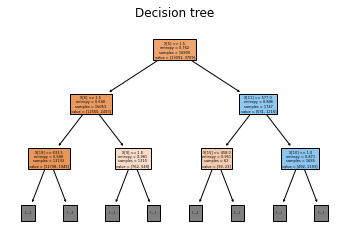

time: 915 ms (started: 2022-05-06 16:27:08 +05:30)


In [47]:
#Fitting Decision Tree classifier using entropy to the training set  
Eclassifier= DecisionTreeClassifier(criterion='entropy', random_state=0)  
Eclassifier.fit(X_train, y_train)  

#Predicting the test set result  
y_DTpred= Eclassifier.predict(X_test)  

#Evaluating the algorithm
print(confusion_matrix(y_test,y_DTpred))
print("Testing Accuracy score:",accuracy_score(y_test, y_DTpred))
print(classification_report(y_test,y_DTpred))

#Plotting Decision Tree using entropy 
plt.figure()
plot_tree(Eclassifier, filled=True, max_depth=2)
plt.title("Decision tree")
plt.show()

In [48]:
#Predicting the test set result  
y_DTpred= Eclassifier.predict(X_test)  

time: 5.22 ms (started: 2022-05-06 16:27:11 +05:30)


In [49]:
#Evaluating the algorithm
print(confusion_matrix(y_test,y_DTpred))
print("Testing Accuracy score:",accuracy_score(y_test, y_DTpred))
print(classification_report(y_test,y_DTpred))

[[2681  583]
 [ 549  387]]
Testing Accuracy score: 0.7304761904761905
              precision    recall  f1-score   support

           0       0.83      0.82      0.83      3264
           1       0.40      0.41      0.41       936

    accuracy                           0.73      4200
   macro avg       0.61      0.62      0.62      4200
weighted avg       0.73      0.73      0.73      4200

time: 17.6 ms (started: 2022-05-06 16:27:11 +05:30)


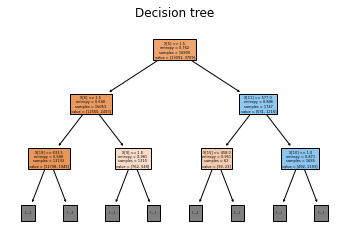

time: 502 ms (started: 2022-05-06 16:27:12 +05:30)


In [50]:
#Plotting Decision Tree using entropy 
plt.figure()
plot_tree(Eclassifier, filled=True, max_depth=2)
plt.title("Decision tree")
plt.show()

### KNN

Minimum error:- 0.2211904761904762 at K = 32


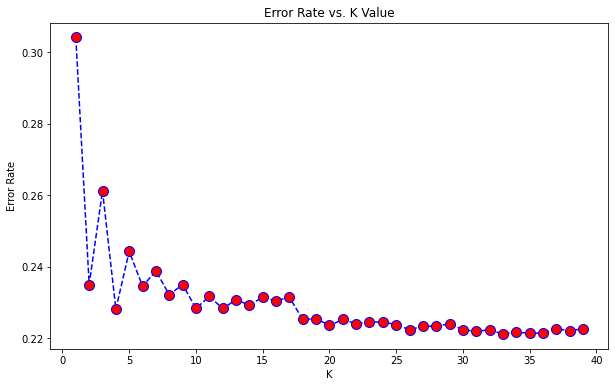

time: 52.3 s (started: 2022-05-06 16:27:14 +05:30)


In [51]:
#Finding Minimum error rate at k-value and plotting the graph
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
#Plotting the graph
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

Maximum accuracy:- 0.7788095238095238 at K = 32


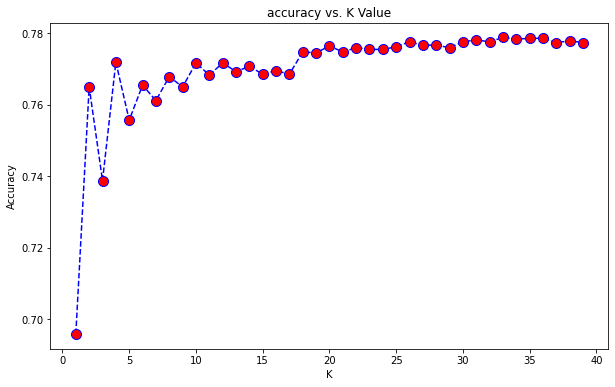

time: 52 s (started: 2022-05-06 16:28:06 +05:30)


In [52]:
#Finding highest accuracy rate at k-value and plotting the graph
acc = []
from sklearn import metrics
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i,).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))
#PLotting the graph    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

In [53]:
#Fitting K-NN classifier to the training set  
KNNclassifier= KNeighborsClassifier(n_neighbors=33)  
KNNclassifier.fit(X_train, y_train)  

KNeighborsClassifier(n_neighbors=33)

time: 7.92 ms (started: 2022-05-06 16:29:27 +05:30)


In [54]:
#Predicting the test set result  
y_KNNpred= KNNclassifier.predict(X_test)  

time: 1.28 s (started: 2022-05-06 16:29:28 +05:30)


In [55]:
#Evaluating the algorithm
print(confusion_matrix(y_test,y_KNNpred))
print("Testing Accuracy score:",accuracy_score(y_test, y_KNNpred))
print(classification_report(y_test,y_KNNpred))

[[3196   68]
 [ 861   75]]
Testing Accuracy score: 0.7788095238095238
              precision    recall  f1-score   support

           0       0.79      0.98      0.87      3264
           1       0.52      0.08      0.14       936

    accuracy                           0.78      4200
   macro avg       0.66      0.53      0.51      4200
weighted avg       0.73      0.78      0.71      4200

time: 17.8 ms (started: 2022-05-06 16:29:30 +05:30)


In [56]:
def Accuracy_BaseModel_score():
    
    """
    print all the testing score of all the models
    
    """
    
    print("Testing Accuracy score of Logistic Regression Model :",accuracy_score(y_test, y_pred_test))
    print("Testing Accuracy score of SVM Model :",accuracy_score(y_test, predict)) 
    print("Testing Accuracy score of Decision Tree Model:",accuracy_score(y_test, y_DTpredict))
    print("Testing Accuracy score of Decision Tree Model using Entropy :",accuracy_score(y_test, y_DTpred))
    print("Testing Accuracy score of KNN Model :",accuracy_score(y_test, y_KNNpred))
    

time: 1.15 ms (started: 2022-05-06 16:29:57 +05:30)


In [57]:
Accuracy_BaseModel_score()

Testing Accuracy score of Logistic Regression Model : 0.7769047619047619
Testing Accuracy score of SVM Model : 0.7771428571428571
Testing Accuracy score of Decision Tree Model: 0.7295238095238096
Testing Accuracy score of Decision Tree Model using Entropy : 0.7304761904761905
Testing Accuracy score of KNN Model : 0.7788095238095238
time: 7.36 ms (started: 2022-05-06 16:29:58 +05:30)


## Base Model after Standarizing

### Highest Accuracy is observed in SVM  Model (82%) and lowest accuracy is observed in Decision Tree Model

In [58]:
#Defining x & y
X = Train_data.iloc[:, :-1] 
y = Train_data['default_payment_next_month']
print(X.shape, y.shape)

(21000, 23) (21000,)
time: 6.25 ms (started: 2022-05-06 16:31:42 +05:30)


In [59]:
#Splitting the data
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(16800, 23) (16800,)
(4200, 23) (4200,)
time: 11.9 ms (started: 2022-05-06 16:31:42 +05:30)


In [60]:
#Standarizing the Test Data
X_train_std = StandardScaler().fit_transform(X_train)
X_test_std = StandardScaler().fit_transform(X_test)
print(X_test.shape, X_train.shape)

(4200, 23) (16800, 23)
time: 20 ms (started: 2022-05-06 16:31:43 +05:30)


### Logistic Regression

In [61]:
#Fitting the Model
lr = LogisticRegression(solver='saga', tol=1e-2, max_iter=200,random_state=42)
lr.fit(X_train_std, y_train)

LogisticRegression(max_iter=200, random_state=42, solver='saga', tol=0.01)

time: 86.6 ms (started: 2022-05-06 16:31:44 +05:30)


In [62]:
#Predicting the test set result
y_pred_test = lr.predict(X_test_std)

time: 1.36 ms (started: 2022-05-06 16:31:44 +05:30)


In [63]:
#accessing confusion matrix
c_matrix_test = confusion_matrix(y_test, y_pred_test)
print("Testing confusion matrix:", c_matrix_test)

Testing confusion matrix: [[3180   84]
 [ 713  223]]
time: 5.22 ms (started: 2022-05-06 16:31:45 +05:30)


In [64]:
#Accuracy score of the model
#print("\nTraining Accuracy score:",accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",accuracy_score(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))

Testing Accuracy score: 0.8102380952380952
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      3264
           1       0.73      0.24      0.36       936

    accuracy                           0.81      4200
   macro avg       0.77      0.61      0.62      4200
weighted avg       0.80      0.81      0.77      4200

time: 17.4 ms (started: 2022-05-06 16:31:45 +05:30)


### SVM

In [65]:
#Implementing SVM through SVC
svc=SVC(random_state=0)
svc.fit(X_train_std,y_train)

SVC(random_state=0)

time: 9.94 s (started: 2022-05-06 16:31:47 +05:30)


In [66]:
#Predicting the test set result
predict=svc.predict(X_test_std)

time: 1.67 s (started: 2022-05-06 16:31:57 +05:30)


In [67]:
#Creating confusion matrix
c_matrix_test = confusion_matrix(y_test, predict)
print("Testing confusion matrix:", c_matrix_test)

Testing confusion matrix: [[3118  146]
 [ 611  325]]
time: 5 ms (started: 2022-05-06 16:32:00 +05:30)


In [68]:
#Accuracy Score of the model
print("Testing Accuracy score:",accuracy_score(y_test, predict))
print(classification_report(y_test, predict))

Testing Accuracy score: 0.8197619047619048
              precision    recall  f1-score   support

           0       0.84      0.96      0.89      3264
           1       0.69      0.35      0.46       936

    accuracy                           0.82      4200
   macro avg       0.76      0.65      0.68      4200
weighted avg       0.80      0.82      0.80      4200

time: 15.6 ms (started: 2022-05-06 16:32:01 +05:30)


### Decision Tree

In [69]:
#Fitting Decision Tree classifier to the training set  
classifier= DecisionTreeClassifier(random_state=0)  
classifier.fit(X_train, y_train)  

DecisionTreeClassifier(random_state=0)

time: 353 ms (started: 2022-05-06 16:32:03 +05:30)


In [70]:
#Predicting the test set result  
y_DTpredict= classifier.predict(X_test)  

time: 10.4 ms (started: 2022-05-06 16:32:04 +05:30)


In [71]:
#Evaluating the algorithm
print(confusion_matrix(y_test,y_DTpredict))
print("Testing Accuracy score:",accuracy_score(y_test, y_DTpredict))
print(classification_report(y_test,y_DTpredict))

[[2688  576]
 [ 560  376]]
Testing Accuracy score: 0.7295238095238096
              precision    recall  f1-score   support

           0       0.83      0.82      0.83      3264
           1       0.39      0.40      0.40       936

    accuracy                           0.73      4200
   macro avg       0.61      0.61      0.61      4200
weighted avg       0.73      0.73      0.73      4200

time: 16.9 ms (started: 2022-05-06 16:32:04 +05:30)


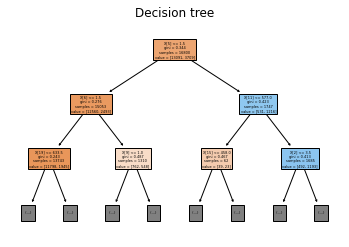

time: 508 ms (started: 2022-05-06 16:32:06 +05:30)


In [72]:
#Plotting Decision Tree
plt.figure()
plot_tree(classifier, filled=True, max_depth=2)
plt.title("Decision tree")
plt.show()

### Decision Tree using entropy 

In [73]:
#Fitting Decision Tree classifier using entropy to the training set  
Eclassifier= DecisionTreeClassifier(criterion='entropy', random_state=0)  
Eclassifier.fit(X_train, y_train)  

DecisionTreeClassifier(criterion='entropy', random_state=0)

time: 409 ms (started: 2022-05-06 16:32:07 +05:30)


In [74]:
#Predicting the test set result  
y_DTpred= Eclassifier.predict(X_test)  

time: 2.93 ms (started: 2022-05-06 16:32:08 +05:30)


In [75]:
#Evaluating the algorithm
print(confusion_matrix(y_test,y_DTpred))
print("Testing Accuracy score:",accuracy_score(y_test, y_DTpred))
print(classification_report(y_test,y_DTpred))

[[2681  583]
 [ 549  387]]
Testing Accuracy score: 0.7304761904761905
              precision    recall  f1-score   support

           0       0.83      0.82      0.83      3264
           1       0.40      0.41      0.41       936

    accuracy                           0.73      4200
   macro avg       0.61      0.62      0.62      4200
weighted avg       0.73      0.73      0.73      4200

time: 13.1 ms (started: 2022-05-06 16:32:08 +05:30)


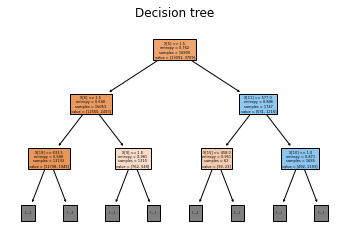

time: 502 ms (started: 2022-05-06 16:32:09 +05:30)


In [76]:
#Plotting Decision Tree using entropy 
plt.figure()
plot_tree(Eclassifier, filled=True, max_depth=2)
plt.title("Decision tree")
plt.show()

### KNN

Minimum error:- 0.18714285714285714 at K = 37


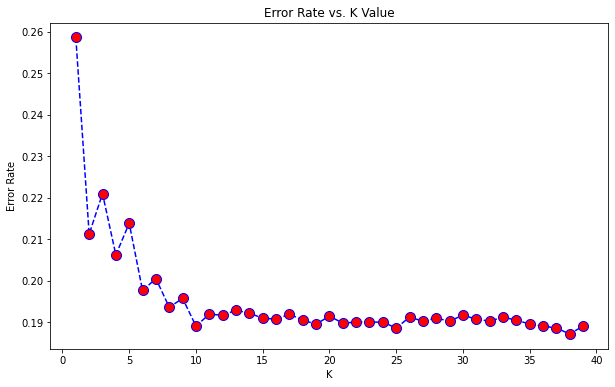

time: 50.8 s (started: 2022-05-06 16:32:11 +05:30)


In [77]:
#Finding Minimum error rate at k-value and plotting the graph
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_std,y_train)
    pred_i = knn.predict(X_test_std)
    error_rate.append(np.mean(pred_i != y_test))
#Plotting the graph
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

Maximum accuracy:- 0.8128571428571428 at K = 37


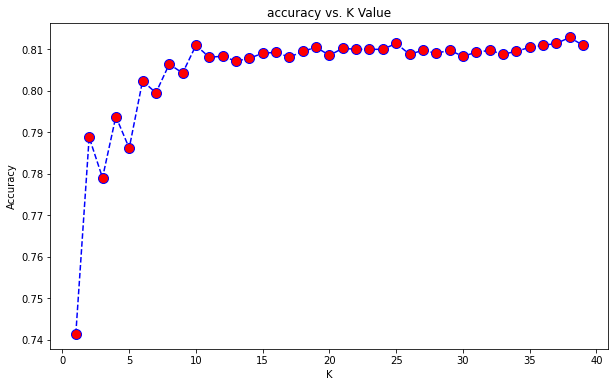

time: 47.9 s (started: 2022-05-06 16:33:04 +05:30)


In [78]:
#Finding highest accuracy rate at k-value and plotting the graph
acc = []
from sklearn import metrics
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i,).fit(X_train_std,y_train)
    yhat = neigh.predict(X_test_std)
    acc.append(metrics.accuracy_score(y_test, yhat))
#PLotting the graph    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

In [79]:
#Fitting K-NN classifier to the training set  
KNNclassifier= KNeighborsClassifier(n_neighbors=37)  
KNNclassifier.fit(X_train_std, y_train)  

KNeighborsClassifier(n_neighbors=37)

time: 5.33 ms (started: 2022-05-06 16:33:58 +05:30)


In [80]:
#Predicting the test set result  
y_KNNpred= KNNclassifier.predict(X_test_std)  

time: 1.22 s (started: 2022-05-06 16:33:59 +05:30)


In [81]:
#Evaluating the algorithm
print(confusion_matrix(y_test,y_KNNpred))
print("Testing Accuracy score:",accuracy_score(y_test, y_KNNpred))
print(classification_report(y_test,y_KNNpred))

[[3116  148]
 [ 644  292]]
Testing Accuracy score: 0.8114285714285714
              precision    recall  f1-score   support

           0       0.83      0.95      0.89      3264
           1       0.66      0.31      0.42       936

    accuracy                           0.81      4200
   macro avg       0.75      0.63      0.66      4200
weighted avg       0.79      0.81      0.78      4200

time: 16.7 ms (started: 2022-05-06 16:34:01 +05:30)


In [82]:
def Accuracy_BaseModel_std_score():
    
    """
    print all the testing score of all the models
    
    """
    
    print("Testing Accuracy score of Logistic Regression Model :",accuracy_score(y_test, y_pred_test))
    print("Testing Accuracy score of SVM Model :",accuracy_score(y_test, predict)) 
    print("Testing Accuracy score of Decision Tree Model:",accuracy_score(y_test, y_DTpredict))
    print("Testing Accuracy score of Decision Tree Model using Entropy :",accuracy_score(y_test, y_DTpred))
    print("Testing Accuracy score of KNN Model :",accuracy_score(y_test, y_KNNpred))
    

time: 1.71 ms (started: 2022-05-06 16:34:03 +05:30)


In [83]:
Accuracy_BaseModel_std_score()

Testing Accuracy score of Logistic Regression Model : 0.8102380952380952
Testing Accuracy score of SVM Model : 0.8197619047619048
Testing Accuracy score of Decision Tree Model: 0.7295238095238096
Testing Accuracy score of Decision Tree Model using Entropy : 0.7304761904761905
Testing Accuracy score of KNN Model : 0.8114285714285714
time: 7.21 ms (started: 2022-05-06 16:34:13 +05:30)


## After Balancing the Data

## Highest Accuracy is observed in Decision Tree Model(84%) and lowest accuracy is observed in SVM Model using kernel = 'Sigmoid'

In [84]:
#Defining x & y
X = Train_data.iloc[:, :-1] 
y = Train_data['default_payment_next_month']
print(X.shape, y.shape)

(21000, 23) (21000,)
time: 6.7 ms (started: 2022-05-06 16:35:02 +05:30)


In [85]:
# Balancing the data using SMOTE and cleaning using ENN technique
from imblearn.combine import SMOTEENN 
sme = SMOTEENN(sampling_strategy='not majority', random_state=42)
X, y = sme.fit_resample(X, y)

time: 19.3 s (started: 2022-05-06 16:35:07 +05:30)


In [86]:
#Splitting the data
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(15278, 23) (15278,)
(3820, 23) (3820,)
time: 11.3 ms (started: 2022-05-06 16:35:27 +05:30)


In [87]:
#Standarizing the Test Data
X_train_std = StandardScaler().fit_transform(X_train)
X_test_std = StandardScaler().fit_transform(X_test)
print(X_test.shape, X_train.shape)

(3820, 23) (15278, 23)
time: 16.1 ms (started: 2022-05-06 16:35:28 +05:30)


## Highest Accuracy is observed in Decision Tree Using Entropy and and SVM Model using kernel = ' sigmoid ' has the lowest accuracy

## Logistic Regression

In [88]:
#Fitting the Model
lr = LogisticRegression(solver='saga', tol=1e-2, max_iter=200,random_state=42)
lr.fit(X_train_std, y_train)

LogisticRegression(max_iter=200, random_state=42, solver='saga', tol=0.01)

time: 232 ms (started: 2022-05-06 16:35:30 +05:30)


In [89]:
#Predicting the test set result
y_pred_test = lr.predict(X_test_std)

time: 2.82 ms (started: 2022-05-06 16:35:31 +05:30)


In [90]:
#accessing confusion matrix
c_matrix_test = confusion_matrix(y_test, y_pred_test)
print("Testing confusion matrix:", c_matrix_test)

Testing confusion matrix: [[ 880  545]
 [ 301 2094]]
time: 3.56 ms (started: 2022-05-06 16:35:31 +05:30)


In [91]:
#Accuracy score of the model
#print("\nTraining Accuracy score:",accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",accuracy_score(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))

Testing Accuracy score: 0.7785340314136125
              precision    recall  f1-score   support

           0       0.75      0.62      0.68      1425
           1       0.79      0.87      0.83      2395

    accuracy                           0.78      3820
   macro avg       0.77      0.75      0.75      3820
weighted avg       0.78      0.78      0.77      3820

time: 16.8 ms (started: 2022-05-06 16:35:32 +05:30)


## SVM

In [92]:
#Implementing SVM through SVC
svc=SVC(random_state=0)
svc.fit(X_train_std,y_train)

SVC(random_state=0)

time: 6.74 s (started: 2022-05-06 16:35:36 +05:30)


In [93]:
#Predicting the test set result
predict=svc.predict(X_test_std)

time: 1.46 s (started: 2022-05-06 16:35:45 +05:30)


In [94]:
#Creating confusion matrix
c_matrix_test = confusion_matrix(y_test, predict)
print("Testing confusion matrix:", c_matrix_test)

Testing confusion matrix: [[1042  383]
 [ 278 2117]]
time: 7.16 ms (started: 2022-05-06 16:35:47 +05:30)


In [95]:
#Accuracy Score of the model
print("Testing Accuracy score:",accuracy_score(y_test, predict))
print(classification_report(y_test, predict))

Testing Accuracy score: 0.8269633507853403
              precision    recall  f1-score   support

           0       0.79      0.73      0.76      1425
           1       0.85      0.88      0.86      2395

    accuracy                           0.83      3820
   macro avg       0.82      0.81      0.81      3820
weighted avg       0.83      0.83      0.83      3820

time: 18.7 ms (started: 2022-05-06 16:35:48 +05:30)


## Applying SVM using Kernel = ' Linear '

In [96]:
#Applying SVM using Kernel='Linear'
svclassifier=SVC(kernel='linear')
svclassifier.fit(X_train_std,y_train)

SVC(kernel='linear')

time: 11.6 s (started: 2022-05-06 16:35:57 +05:30)


In [97]:
#Predicting the test set result
y_predict = svclassifier.predict(X_test_std)

time: 778 ms (started: 2022-05-06 16:36:09 +05:30)


In [98]:
#Evaluating the algorithm
print(confusion_matrix(y_test,y_predict))
print("Testing Accuracy score:",accuracy_score(y_test, y_predict))
print(classification_report(y_test,y_predict))

[[ 894  531]
 [ 289 2106]]
Testing Accuracy score: 0.7853403141361257
              precision    recall  f1-score   support

           0       0.76      0.63      0.69      1425
           1       0.80      0.88      0.84      2395

    accuracy                           0.79      3820
   macro avg       0.78      0.75      0.76      3820
weighted avg       0.78      0.79      0.78      3820

time: 18.3 ms (started: 2022-05-06 16:36:11 +05:30)


## Applying SVM using Kernel = ' Polynomial '

In [99]:
#Applying SVM using Kernel='poly'
P_svclassifier=SVC(kernel='poly')
P_svclassifier.fit(X_train_std,y_train)

SVC(kernel='poly')

time: 7.07 s (started: 2022-05-06 16:36:14 +05:30)


In [100]:
#Predicting the test set result
y_prediction = P_svclassifier.predict(X_test_std)

time: 885 ms (started: 2022-05-06 16:36:22 +05:30)


In [101]:
#Evaluating the algorithm
print(confusion_matrix(y_test,y_prediction))
print("Testing Accuracy score:",accuracy_score(y_test, y_prediction))
print(classification_report(y_test,y_prediction))

[[ 895  530]
 [ 207 2188]]
Testing Accuracy score: 0.8070680628272251
              precision    recall  f1-score   support

           0       0.81      0.63      0.71      1425
           1       0.81      0.91      0.86      2395

    accuracy                           0.81      3820
   macro avg       0.81      0.77      0.78      3820
weighted avg       0.81      0.81      0.80      3820

time: 20.8 ms (started: 2022-05-06 16:36:23 +05:30)


## Applying SVM using Kernel = ' Gaussian or RBF '

In [102]:
#Applying SVM using Kernel='rbf'
G_svclassifier=SVC(kernel='rbf')
G_svclassifier.fit(X_train_std,y_train)

SVC()

time: 6.61 s (started: 2022-05-06 16:36:36 +05:30)


In [103]:
#Predicting the test set result
ypredict = G_svclassifier.predict(X_test_std)

time: 1.44 s (started: 2022-05-06 16:36:44 +05:30)


In [104]:
#Evaluating the algorithm
print(confusion_matrix(y_test,ypredict))
print("Testing Accuracy score:",accuracy_score(y_test, ypredict))
print(classification_report(y_test,ypredict))

[[1042  383]
 [ 278 2117]]
Testing Accuracy score: 0.8269633507853403
              precision    recall  f1-score   support

           0       0.79      0.73      0.76      1425
           1       0.85      0.88      0.86      2395

    accuracy                           0.83      3820
   macro avg       0.82      0.81      0.81      3820
weighted avg       0.83      0.83      0.83      3820

time: 11.9 ms (started: 2022-05-06 16:36:46 +05:30)


## Applying SVM using Kernel = ' Sigmoid '

In [105]:
#Applying SVM using Kernel='sigmoid'
S_svclassifier1=SVC(kernel='sigmoid')
S_svclassifier1.fit(X_train_std,y_train)

SVC(kernel='sigmoid')

time: 6.76 s (started: 2022-05-06 16:36:48 +05:30)


In [106]:
#Predicting the test set result
yprediction = S_svclassifier1.predict(X_test_std)

time: 1.14 s (started: 2022-05-06 16:36:55 +05:30)


In [107]:
#Evaluating the algorithm
print(confusion_matrix(y_test,yprediction))
print("Testing Accuracy score:",accuracy_score(y_test, yprediction))
print(classification_report(y_test,yprediction))

[[ 781  644]
 [ 615 1780]]
Testing Accuracy score: 0.6704188481675393
              precision    recall  f1-score   support

           0       0.56      0.55      0.55      1425
           1       0.73      0.74      0.74      2395

    accuracy                           0.67      3820
   macro avg       0.65      0.65      0.65      3820
weighted avg       0.67      0.67      0.67      3820

time: 22.6 ms (started: 2022-05-06 16:36:57 +05:30)


## Decision Tree

In [108]:
#Fitting Decision Tree classifier to the training set  
classifier= DecisionTreeClassifier(random_state=0)  
classifier.fit(X_train, y_train)  

DecisionTreeClassifier(random_state=0)

time: 279 ms (started: 2022-05-06 16:36:59 +05:30)


In [109]:
#Predicting the test set result  
y_DTpredict= classifier.predict(X_test)  

time: 9.2 ms (started: 2022-05-06 16:37:00 +05:30)


In [110]:
#Evaluating the algorithm
print(confusion_matrix(y_test,y_DTpredict))
print("Testing Accuracy score:",accuracy_score(y_test, y_DTpredict))
print(classification_report(y_test,y_DTpredict))

[[1065  360]
 [ 304 2091]]
Testing Accuracy score: 0.8261780104712042
              precision    recall  f1-score   support

           0       0.78      0.75      0.76      1425
           1       0.85      0.87      0.86      2395

    accuracy                           0.83      3820
   macro avg       0.82      0.81      0.81      3820
weighted avg       0.83      0.83      0.83      3820

time: 20.4 ms (started: 2022-05-06 16:37:02 +05:30)


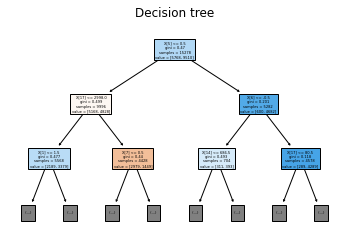

time: 522 ms (started: 2022-05-06 16:37:08 +05:30)


In [111]:
#Plotting Decision Tree
plt.figure()
plot_tree(classifier, filled=True, max_depth=2)
plt.title("Decision tree")
plt.show()

##  Decision Tree using Entropy

In [168]:
#Fitting Decision Tree classifier using entropy to the training set  
Eclassifier= DecisionTreeClassifier(criterion='entropy', random_state=0)  
Eclassifier.fit(X_train, y_train)  

DecisionTreeClassifier(criterion='entropy', random_state=0)

time: 169 ms (started: 2022-05-06 16:58:58 +05:30)


In [169]:
#Predicting the test set result  
y_DTpred= Eclassifier.predict(X_test)

time: 7.31 ms (started: 2022-05-06 16:58:59 +05:30)


In [114]:
#Evaluating the algorithm
print(confusion_matrix(y_test,y_DTpred))
print("Testing Accuracy score:",accuracy_score(y_test, y_DTpred))
print(classification_report(y_test,y_DTpred))

[[1103  322]
 [ 274 2121]]
Testing Accuracy score: 0.8439790575916231
              precision    recall  f1-score   support

           0       0.80      0.77      0.79      1425
           1       0.87      0.89      0.88      2395

    accuracy                           0.84      3820
   macro avg       0.83      0.83      0.83      3820
weighted avg       0.84      0.84      0.84      3820

time: 19.1 ms (started: 2022-05-06 16:37:12 +05:30)


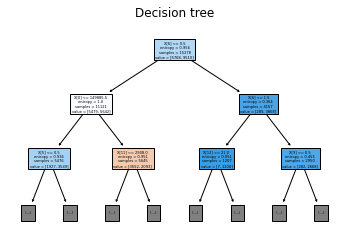

time: 504 ms (started: 2022-05-06 16:37:19 +05:30)


In [115]:
#Plotting Decision Tree using entropy 
plt.figure()
plot_tree(Eclassifier, filled=True, max_depth=2)
plt.title("Decision tree")
plt.show()

## KNN

Minimum error:- 0.17486910994764399 at K = 0


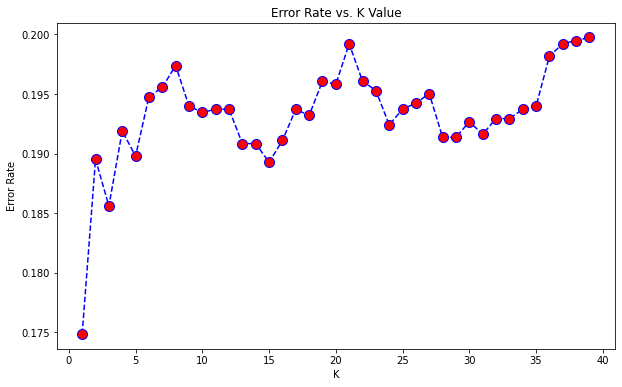

time: 39 s (started: 2022-05-06 16:37:24 +05:30)


In [116]:
#Finding Minimum error rate at k-value and plotting the graph
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_std,y_train)
    pred_i = knn.predict(X_test_std)
    error_rate.append(np.mean(pred_i != y_test))
#Plotting the graph
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

Maximum accuracy:- 0.8251308900523561 at K = 0


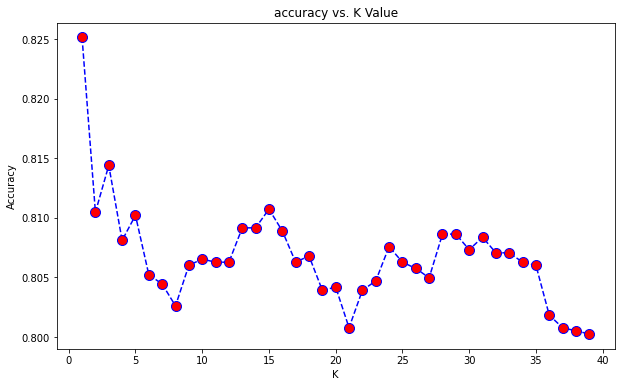

time: 38.9 s (started: 2022-05-06 16:38:12 +05:30)


In [117]:
#Finding highest accuracy rate at k-value and plotting the graph
acc = []
from sklearn import metrics
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i,).fit(X_train_std,y_train)
    yhat = neigh.predict(X_test_std)
    acc.append(metrics.accuracy_score(y_test, yhat))
#PLotting the graph    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

In [118]:
#Fitting K-NN classifier to the training set  
KNNclassifier= KNeighborsClassifier(n_neighbors=5)  
KNNclassifier.fit(X_train_std, y_train)  

KNeighborsClassifier()

time: 5.46 ms (started: 2022-05-06 16:39:38 +05:30)


In [119]:
#Predicting the test set result  
y_KNNpred= KNNclassifier.predict(X_test_std)  

time: 1.02 s (started: 2022-05-06 16:39:38 +05:30)


In [120]:
#Evaluating the algorithm
print(confusion_matrix(y_test,y_KNNpred))
print("Testing Accuracy score:",accuracy_score(y_test, y_KNNpred))
print(classification_report(y_test,y_KNNpred))

[[ 997  428]
 [ 297 2098]]
Testing Accuracy score: 0.8102094240837696
              precision    recall  f1-score   support

           0       0.77      0.70      0.73      1425
           1       0.83      0.88      0.85      2395

    accuracy                           0.81      3820
   macro avg       0.80      0.79      0.79      3820
weighted avg       0.81      0.81      0.81      3820

time: 18.6 ms (started: 2022-05-06 16:39:40 +05:30)


In [122]:
def Accuracy_Model_score():
    
    """
    print all the testing score of all the models
    
    """
    
    print("Testing Accuracy score of Logistic Regression Model :",accuracy_score(y_test, y_pred_test))
    print("Testing Accuracy score of SVM Model :",accuracy_score(y_test, predict))
    print("Testing Accuracy score of SVM Model using kernel = 'Linear':",accuracy_score(y_test, y_predict))
    print("Testing Accuracy score of SVM Model using kernel = 'Polynomial':",accuracy_score(y_test, y_prediction))
    print("Testing Accuracy score of SVM Model using kernel = 'RBF':",accuracy_score(y_test, ypredict))
    print("Testing Accuracy score of SVM Model using kernel = 'Sigmoid':",accuracy_score(y_test, yprediction))  
    print("Testing Accuracy score of Decision Tree Model:",accuracy_score(y_test, y_DTpredict))
    print("Testing Accuracy score of Decision Tree Model using Entropy :",accuracy_score(y_test, y_DTpred))
    print("Testing Accuracy score of KNN Model :",accuracy_score(y_test, y_KNNpred))
    

time: 1.38 ms (started: 2022-05-06 16:39:54 +05:30)


In [123]:
Accuracy_Model_score() 

Testing Accuracy score of Logistic Regression Model : 0.7785340314136125
Testing Accuracy score of SVM Model : 0.8269633507853403
Testing Accuracy score of SVM Model using kernel = 'Linear': 0.7853403141361257
Testing Accuracy score of SVM Model using kernel = 'Polynomial': 0.8070680628272251
Testing Accuracy score of SVM Model using kernel = 'RBF': 0.8269633507853403
Testing Accuracy score of SVM Model using kernel = 'Sigmoid': 0.6704188481675393
Testing Accuracy score of Decision Tree Model: 0.8261780104712042
Testing Accuracy score of Decision Tree Model using Entropy : 0.8439790575916231
Testing Accuracy score of KNN Model : 0.8102094240837696
time: 13.3 ms (started: 2022-05-06 16:39:55 +05:30)


### Merging all monthwise columns of Repayment status & Amount of bill statement columns into one column

In [22]:
#Creating single colum of Repayment status(all months) by finding avg of the columns
Train_data['PAY'] = Train_data.loc[:,['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].mean(axis = 1)
Train_data = Train_data.drop(['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'], axis = 1)
Train_data

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month,PAY
0,25150,360000,2,2,2,25,20952,12590,3479,3435,8870,2020,12590,3479,3446,8870,2020,27043,0,-1.000000
1,13470,240000,2,1,2,46,456,0,0,2240,1681,2267,0,0,2240,0,2267,3074,0,0.000000
2,3092,320000,2,2,1,41,49846,53811,38717,35409,35036,35939,5000,2000,2000,3000,3000,1500,0,0.000000
3,13973,50000,2,2,2,24,2675,0,0,0,0,0,0,0,0,0,0,0,1,-1.666667
4,10567,80000,1,3,1,52,35861,18521,19385,20561,21261,21457,1500,1500,1500,1028,876,1449,0,-0.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20995,6283,50000,2,2,2,31,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.500000
20996,25589,80000,2,2,1,37,69767,73197,44195,45458,48679,49895,5000,3000,2000,4000,2000,2000,0,0.000000
20997,4378,100000,1,1,1,52,21509,20877,24122,23440,28843,31353,0,3600,0,6000,3000,0,1,1.166667
20998,8604,90000,2,2,1,47,28477,28718,28847,28747,29177,29452,2000,2000,2000,2000,2000,2000,0,0.000000


time: 17 ms (started: 2022-05-13 10:40:14 +05:30)


In [23]:
Train_data

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month,PAY
0,25150,360000,2,2,2,25,20952,12590,3479,3435,8870,2020,12590,3479,3446,8870,2020,27043,0,-1.000000
1,13470,240000,2,1,2,46,456,0,0,2240,1681,2267,0,0,2240,0,2267,3074,0,0.000000
2,3092,320000,2,2,1,41,49846,53811,38717,35409,35036,35939,5000,2000,2000,3000,3000,1500,0,0.000000
3,13973,50000,2,2,2,24,2675,0,0,0,0,0,0,0,0,0,0,0,1,-1.666667
4,10567,80000,1,3,1,52,35861,18521,19385,20561,21261,21457,1500,1500,1500,1028,876,1449,0,-0.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20995,6283,50000,2,2,2,31,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.500000
20996,25589,80000,2,2,1,37,69767,73197,44195,45458,48679,49895,5000,3000,2000,4000,2000,2000,0,0.000000
20997,4378,100000,1,1,1,52,21509,20877,24122,23440,28843,31353,0,3600,0,6000,3000,0,1,1.166667
20998,8604,90000,2,2,1,47,28477,28718,28847,28747,29177,29452,2000,2000,2000,2000,2000,2000,0,0.000000


time: 11.4 ms (started: 2022-05-13 10:40:14 +05:30)


In [24]:
#Creating single colum of Repayment status(all months) by finding avg of the columns
Test_data['PAY'] = Test_data.loc[:,['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].mean(axis = 1)
Test_data = Test_data.drop(['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'], axis = 1)
Test_data

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,PAY
0,10178,60000,2,2,1,30,36082,37127,38117,38874,38667,39544,1628,1618,1375,1403,1520,1205,0.000000
1,5304,200000,2,1,2,29,61099,64160,76593,93988,50292,10510,4160,14593,20150,0,5739,12050,0.333333
2,5187,230000,1,1,2,39,38395,39943,20650,0,0,0,2500,2000,0,0,0,0,-0.666667
3,14495,150000,1,1,2,40,152175,148872,145978,139791,142745,146872,5800,5245,5200,5200,6500,7200,0.000000
4,20444,140000,1,2,2,27,80210,67746,76230,77954,78953,81848,10000,10000,3393,3260,5000,3000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,16413,230000,2,2,1,42,3210,0,0,0,0,0,0,0,0,0,0,0,-1.666667
8996,17210,90000,2,1,2,28,2780,1950,7956,499,0,5990,1950,7956,499,0,5990,0,-1.000000
8997,24002,60000,1,2,2,26,58072,59040,57416,55736,26958,28847,2282,2324,2049,2000,3000,1120,0.000000
8998,17019,70000,2,2,2,23,44830,46185,47208,47241,48212,45849,2100,2079,2500,2000,2000,1700,0.000000


time: 16.8 ms (started: 2022-05-13 10:40:15 +05:30)


In [25]:
#Creating single colum of Amount of bill statement(all months) by finding avg of the columns
Test_data['BILL_AMT'] = Test_data.loc[:,['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].mean(axis = 1)
Test_data = Test_data.drop(['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6'], axis = 1)
Test_data

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,PAY,BILL_AMT
0,10178,60000,2,2,1,30,1628,1618,1375,1403,1520,1205,0.000000,38068.500000
1,5304,200000,2,1,2,29,4160,14593,20150,0,5739,12050,0.333333,59440.333333
2,5187,230000,1,1,2,39,2500,2000,0,0,0,0,-0.666667,16498.000000
3,14495,150000,1,1,2,40,5800,5245,5200,5200,6500,7200,0.000000,146072.166667
4,20444,140000,1,2,2,27,10000,10000,3393,3260,5000,3000,0.000000,77156.833333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,16413,230000,2,2,1,42,0,0,0,0,0,0,-1.666667,535.000000
8996,17210,90000,2,1,2,28,1950,7956,499,0,5990,0,-1.000000,3195.833333
8997,24002,60000,1,2,2,26,2282,2324,2049,2000,3000,1120,0.000000,47678.166667
8998,17019,70000,2,2,2,23,2100,2079,2500,2000,2000,1700,0.000000,46587.500000


time: 13.2 ms (started: 2022-05-13 10:40:15 +05:30)


In [26]:
#Creating single colum of Amount of bill statement(all months) by finding avg of the columns
Train_data['BILL_AMT'] = Train_data.loc[:,['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].mean(axis = 1)
Train_data = Train_data.drop(['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6'], axis = 1)
Train_data

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month,PAY,BILL_AMT
0,25150,360000,2,2,2,25,12590,3479,3446,8870,2020,27043,0,-1.000000,8557.666667
1,13470,240000,2,1,2,46,0,0,2240,0,2267,3074,0,0.000000,1107.333333
2,3092,320000,2,2,1,41,5000,2000,2000,3000,3000,1500,0,0.000000,41459.666667
3,13973,50000,2,2,2,24,0,0,0,0,0,0,1,-1.666667,445.833333
4,10567,80000,1,3,1,52,1500,1500,1500,1028,876,1449,0,-0.166667,22841.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20995,6283,50000,2,2,2,31,0,0,0,0,0,0,0,-1.500000,0.000000
20996,25589,80000,2,2,1,37,5000,3000,2000,4000,2000,2000,0,0.000000,55198.500000
20997,4378,100000,1,1,1,52,0,3600,0,6000,3000,0,1,1.166667,25024.000000
20998,8604,90000,2,2,1,47,2000,2000,2000,2000,2000,2000,0,0.000000,28903.000000


time: 20.4 ms (started: 2022-05-13 10:40:16 +05:30)


In [27]:
#changing the order of columns
cols = Train_data.columns.tolist()
cols = cols[-2:] + cols[:-2]
Train_data = Train_data[cols]

time: 4.09 ms (started: 2022-05-13 10:40:16 +05:30)


In [28]:
#changing the order of columns
cols = Test_data.columns.tolist()
cols = cols[-2:] + cols[:-2]
Test_data = Test_data[cols]

time: 2.82 ms (started: 2022-05-13 10:40:17 +05:30)


### Pay and Default payment are highly corelated

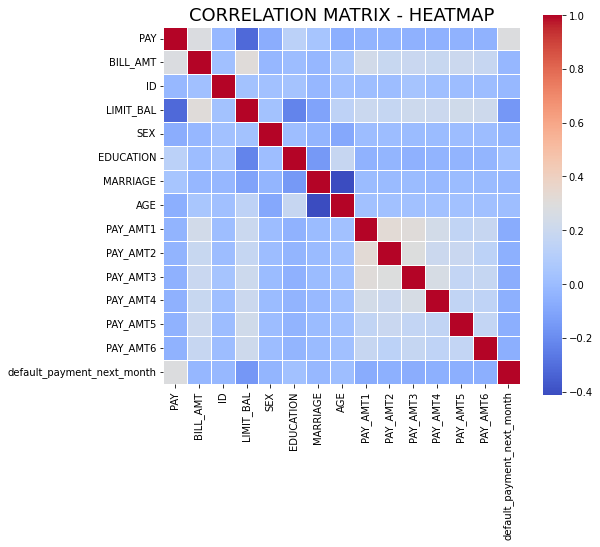

time: 512 ms (started: 2022-05-13 10:40:17 +05:30)


In [29]:
#Correlations matrix after merging columns
corr = Train_data.corr() 
f,ax = plt.subplots(figsize=(8, 7))
sns.heatmap(corr, cbar = True,  square = True, annot = False, 
            xticklabels= True, yticklabels= True
            ,cmap="coolwarm", linewidths=.5, ax=ax)
plt.title('CORRELATION MATRIX - HEATMAP', size=18);

In [30]:
# Set 'category' type to categorical attributes
categorical = Train_data[[ 'MARRIAGE']]

# one-hot encoding
Train_data=pd.concat([
                pd.get_dummies(Train_data['MARRIAGE'], prefix='MARRIAGE'),
                Train_data],axis=1)
# drop original columns
Train_data.drop(['MARRIAGE'],axis=1, inplace=True)
# print samples
Train_data.head()

,MARRIAGE_0,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,PAY,BILL_AMT,ID,LIMIT_BAL,SEX,EDUCATION,AGE,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,0,0,1,0,-1.000000,8557.666667,25150,360000,2,2,25,12590,3479,3446,8870,2020,27043,0
1,0,0,1,0,0.000000,1107.333333,13470,240000,2,1,46,0,0,2240,0,2267,3074,0
2,0,1,0,0,0.000000,41459.666667,3092,320000,2,2,41,5000,2000,2000,3000,3000,1500,0
3,0,0,1,0,-1.666667,445.833333,13973,50000,2,2,24,0,0,0,0,0,0,1
4,0,1,0,0,-0.166667,22841.000000,10567,80000,1,3,52,1500,1500,1500,1028,876,1449,0


time: 37.3 ms (started: 2022-05-13 10:40:18 +05:30)


In [31]:
# Set 'category' type to categorical attributes
categorical = Test_data[[ 'MARRIAGE']]

# one-hot encoding
Test_data=pd.concat([
                pd.get_dummies(Test_data['MARRIAGE'], prefix='MARRIAGE'),
                Test_data],axis=1)
# drop original columns
Test_data.drop(['MARRIAGE'],axis=1, inplace=True)
# print samples
Test_data.head()

,MARRIAGE_0,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,PAY,BILL_AMT,ID,LIMIT_BAL,SEX,EDUCATION,AGE,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,0,1,0,0,0.000000,38068.500000,10178,60000,2,2,30,1628,1618,1375,1403,1520,1205
1,0,0,1,0,0.333333,59440.333333,5304,200000,2,1,29,4160,14593,20150,0,5739,12050
2,0,0,1,0,-0.666667,16498.000000,5187,230000,1,1,39,2500,2000,0,0,0,0
3,0,0,1,0,0.000000,146072.166667,14495,150000,1,1,40,5800,5245,5200,5200,6500,7200
4,0,0,1,0,0.000000,77156.833333,20444,140000,1,2,27,10000,10000,3393,3260,5000,3000


time: 16.7 ms (started: 2022-05-13 10:40:19 +05:30)


In [32]:
#Ordinal Encoding on train data
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(Train_data["EDUCATION"])
le.transform(Train_data["EDUCATION"])
Train_data

,MARRIAGE_0,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,PAY,BILL_AMT,ID,LIMIT_BAL,SEX,EDUCATION,AGE,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,0,0,1,0,-1.000000,8557.666667,25150,360000,2,2,25,12590,3479,3446,8870,2020,27043,0
1,0,0,1,0,0.000000,1107.333333,13470,240000,2,1,46,0,0,2240,0,2267,3074,0
2,0,1,0,0,0.000000,41459.666667,3092,320000,2,2,41,5000,2000,2000,3000,3000,1500,0
3,0,0,1,0,-1.666667,445.833333,13973,50000,2,2,24,0,0,0,0,0,0,1
4,0,1,0,0,-0.166667,22841.000000,10567,80000,1,3,52,1500,1500,1500,1028,876,1449,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20995,0,0,1,0,-1.500000,0.000000,6283,50000,2,2,31,0,0,0,0,0,0,0
20996,0,1,0,0,0.000000,55198.500000,25589,80000,2,2,37,5000,3000,2000,4000,2000,2000,0
20997,0,1,0,0,1.166667,25024.000000,4378,100000,1,1,52,0,3600,0,6000,3000,0,1
20998,0,1,0,0,0.000000,28903.000000,8604,90000,2,2,47,2000,2000,2000,2000,2000,2000,0


time: 18.4 ms (started: 2022-05-13 10:40:19 +05:30)


In [33]:
#Ordinal Encoding on Test data
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(Test_data["EDUCATION"])
le.transform(Test_data["EDUCATION"])

array([1, 0, 0, ..., 1, 1, 1])

time: 211 ms (started: 2022-05-13 10:40:19 +05:30)


In [34]:
Train_data

,MARRIAGE_0,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,PAY,BILL_AMT,ID,LIMIT_BAL,SEX,EDUCATION,AGE,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,0,0,1,0,-1.000000,8557.666667,25150,360000,2,2,25,12590,3479,3446,8870,2020,27043,0
1,0,0,1,0,0.000000,1107.333333,13470,240000,2,1,46,0,0,2240,0,2267,3074,0
2,0,1,0,0,0.000000,41459.666667,3092,320000,2,2,41,5000,2000,2000,3000,3000,1500,0
3,0,0,1,0,-1.666667,445.833333,13973,50000,2,2,24,0,0,0,0,0,0,1
4,0,1,0,0,-0.166667,22841.000000,10567,80000,1,3,52,1500,1500,1500,1028,876,1449,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20995,0,0,1,0,-1.500000,0.000000,6283,50000,2,2,31,0,0,0,0,0,0,0
20996,0,1,0,0,0.000000,55198.500000,25589,80000,2,2,37,5000,3000,2000,4000,2000,2000,0
20997,0,1,0,0,1.166667,25024.000000,4378,100000,1,1,52,0,3600,0,6000,3000,0,1
20998,0,1,0,0,0.000000,28903.000000,8604,90000,2,2,47,2000,2000,2000,2000,2000,2000,0


time: 17.4 ms (started: 2022-05-13 10:40:20 +05:30)


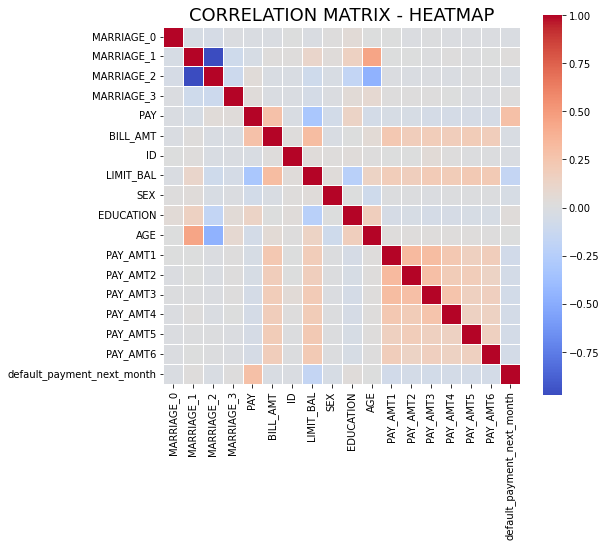

time: 284 ms (started: 2022-05-12 17:52:59 +05:30)


In [35]:
#Correlations matrix after merging columns
corr = Train_data.corr() 
f,ax = plt.subplots(figsize=(8, 7))
sns.heatmap(corr, cbar = True,  square = True, annot = False, 
            xticklabels= True, yticklabels= True
            ,cmap="coolwarm", linewidths=.5, ax=ax)
plt.title('CORRELATION MATRIX - HEATMAP', size=18);

## Model after merging columns 

### After merging the columns, no chnages has been observed.

### In this, highest Accuracy and ROC (69%) is observed in Decision Tree Using Entropy and Logistic Regression has the lowest accuracy.

In [35]:
#Defining x & y
X = Train_data.iloc[:, :-1] 
y = Train_data['default_payment_next_month']
print(X.shape, y.shape)

(21000, 17) (21000,)
time: 2.46 ms (started: 2022-05-13 10:40:35 +05:30)


In [36]:
from imblearn.combine import SMOTEENN 
sme = SMOTEENN(sampling_strategy='minority', random_state=42)
X, y = sme.fit_resample(X, y)

time: 19.1 s (started: 2022-05-13 10:40:36 +05:30)


In [37]:
#Splitting the data
X_train,X_test,y_train,y_test=train_test_split(X, y, random_state=0, shuffle=True)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(14082, 17) (14082,)
(4694, 17) (4694,)
time: 8.16 ms (started: 2022-05-13 10:40:56 +05:30)


In [38]:
#Standarizing the Test Data
X_train_std = StandardScaler().fit_transform(X_train)
X_test_std = StandardScaler().fit_transform(X_test)
print(X_test.shape, X_train.shape)

(4694, 17) (14082, 17)
time: 10.6 ms (started: 2022-05-13 10:40:57 +05:30)


In [39]:
#Standarizing the Test Data
X_train_std = StandardScaler().fit_transform(X_train)
X_test_std = StandardScaler().fit_transform(X_test)
print(X_test.shape, X_train.shape)

(4694, 17) (14082, 17)
time: 15.1 ms (started: 2022-05-13 10:40:58 +05:30)


## Logistic Regression

In [44]:
#Fitting the Model
lr = LogisticRegression(C = 1.3348344445560874, solver='saga', penalty = 'l1', tol=1e-2, max_iter=200,random_state=42)
lr.fit(X_train_std, y_train)

LogisticRegression(C=1.3348344445560874, max_iter=200, penalty='l1',
                   random_state=42, solver='saga', tol=0.01)

time: 213 ms (started: 2022-05-10 11:33:22 +05:30)


In [45]:
#Predicting the test set result
y_pred_test = lr.predict(X_test_std)

time: 10.4 ms (started: 2022-05-10 11:33:23 +05:30)


In [46]:
#accessing confusion matrix
c_matrix_test = confusion_matrix(y_test, y_pred_test)
print("Testing confusion matrix:", c_matrix_test)

Testing confusion matrix: [[1110  372]
 [ 357 1902]]
time: 97.6 ms (started: 2022-05-10 11:33:24 +05:30)


<AxesSubplot:>

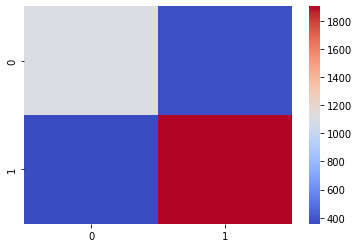

time: 133 ms (started: 2022-05-10 11:33:25 +05:30)


In [47]:
#Heat map of confusion_matrix
cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm,cmap='coolwarm')

In [48]:
#Accuracy score of the model
#print("\nTraining Accuracy score:",accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",accuracy_score(y_test, y_pred_test))
print("ROC Score:",roc_auc_score(y_test, y_pred_test) )
print(classification_report(y_test, y_pred_test))

Testing Accuracy score: 0.8051323175621492
ROC Score: 0.7954766628492778
              precision    recall  f1-score   support

           0       0.76      0.75      0.75      1482
           1       0.84      0.84      0.84      2259

    accuracy                           0.81      3741
   macro avg       0.80      0.80      0.80      3741
weighted avg       0.80      0.81      0.80      3741

time: 106 ms (started: 2022-05-10 11:33:25 +05:30)


In [47]:
#Creating dataframe
report = classification_report(y_test,y_pred_test, output_dict=True)
df_LR = pd.DataFrame(report).T

time: 12.7 ms (started: 2022-05-09 19:10:44 +05:30)


In [48]:
#Resetting & renaming index
df_LR.reset_index(level=0, inplace=True)
df_LR.rename({'index': 'Logistic Regression Classifier'}, axis=1, inplace=True)
df_LR

,Logistic Regression Classifier,precision,recall,f1-score,support
0,0,0.742254,0.741731,0.741992,1421.000000
1,1,0.842894,0.843255,0.843074,2335.000000
2,accuracy,0.804846,0.804846,0.804846,0.804846
3,macro avg,0.792574,0.792493,0.792533,3756.000000
4,weighted avg,0.804819,0.804846,0.804832,3756.000000


time: 14.3 ms (started: 2022-05-09 19:10:45 +05:30)


## SVM

In [49]:
#Implementing SVM through SVC
svc=SVC(random_state=0)
svc.fit(X_train_std,y_train)

SVC(random_state=0)

time: 4.94 s (started: 2022-05-10 11:33:34 +05:30)


In [50]:
#Predicting the test set result
predict=svc.predict(X_test_std)

time: 1.07 s (started: 2022-05-10 11:33:40 +05:30)


In [51]:
#Creating confusion matrix
c_matrix_test = confusion_matrix(y_test, predict)
print("Testing confusion matrix:", c_matrix_test)

Testing confusion matrix: [[1192  290]
 [ 324 1935]]
time: 5.32 ms (started: 2022-05-10 11:33:42 +05:30)


<AxesSubplot:>

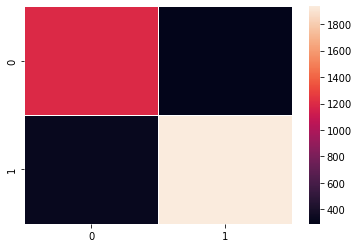

time: 136 ms (started: 2022-05-10 11:33:43 +05:30)


In [52]:
#Heat map of confusion_matrix
cm = confusion_matrix(y_test, predict)
sns.heatmap(cm,linewidths=1)

In [53]:
#Accuracy Score of the model
print("Testing Accuracy score:",accuracy_score(y_test, predict))
print("ROC Score:",roc_auc_score(y_test, predict) )
print(classification_report(y_test, predict))

Testing Accuracy score: 0.8358727612937717
ROC Score: 0.8304460968541489
              precision    recall  f1-score   support

           0       0.79      0.80      0.80      1482
           1       0.87      0.86      0.86      2259

    accuracy                           0.84      3741
   macro avg       0.83      0.83      0.83      3741
weighted avg       0.84      0.84      0.84      3741

time: 18.8 ms (started: 2022-05-10 11:33:46 +05:30)


In [54]:
#Creating dataframe
report = classification_report(y_test,predict, output_dict=True)
df_SVM = pd.DataFrame(report).T

time: 17.1 ms (started: 2022-05-09 19:11:13 +05:30)


In [55]:
#Resetting & renaming index
df_SVM.reset_index(level=0, inplace=True)
df_SVM.rename({'index': 'SVM Classifier'}, axis=1, inplace=True)
df_SVM

,SVM Classifier,precision,recall,f1-score,support
0,0,0.792614,0.785362,0.788971,1421.000000
1,1,0.870102,0.874946,0.872518,2335.000000
2,accuracy,0.841054,0.841054,0.841054,0.841054
3,macro avg,0.831358,0.830154,0.830744,3756.000000
4,weighted avg,0.840786,0.841054,0.840910,3756.000000


time: 15 ms (started: 2022-05-09 19:11:14 +05:30)


## Decision Tree

In [54]:
#Fitting Decision Tree classifier to the training set  
classifier= DecisionTreeClassifier(random_state=0)  
classifier.fit(X_train, y_train)  

DecisionTreeClassifier(random_state=0)

time: 199 ms (started: 2022-05-10 11:33:53 +05:30)


In [55]:
#Predicting the test set result  
y_DTpredict= classifier.predict(X_test)  

time: 7.75 ms (started: 2022-05-10 11:33:53 +05:30)


In [56]:
#Evaluating the algorithm
print(confusion_matrix(y_test,y_DTpredict))
print("Testing Accuracy score:",accuracy_score(y_test, y_DTpredict))
print("ROC Score:",roc_auc_score(y_test, y_DTpredict) )
print(classification_report(y_test,y_DTpredict))

[[1150  332]
 [ 253 2006]]
Testing Accuracy score: 0.8436246992782679
ROC Score: 0.8319909744736752
              precision    recall  f1-score   support

           0       0.82      0.78      0.80      1482
           1       0.86      0.89      0.87      2259

    accuracy                           0.84      3741
   macro avg       0.84      0.83      0.83      3741
weighted avg       0.84      0.84      0.84      3741

time: 19.3 ms (started: 2022-05-10 11:33:54 +05:30)


<AxesSubplot:>

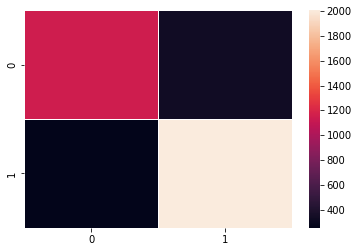

time: 130 ms (started: 2022-05-10 11:33:55 +05:30)


In [57]:
#Heat map of confusion_matrix
cm = confusion_matrix(y_test, y_DTpredict)
sns.heatmap(cm,linewidths=1)

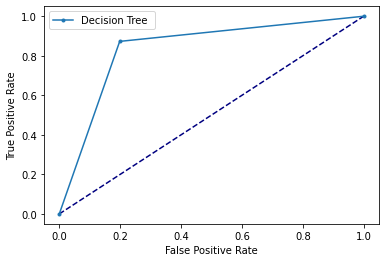

time: 132 ms (started: 2022-05-09 19:00:29 +05:30)


In [75]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
lr_probs = classifier.predict(X_test)
# keeping probabilities for the positive outcome only
#lr_probs = lr_probs[:, 1]
#print(lr_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot([0, 1], [0, 1], color="navy",linestyle="--")
plt.plot(fpr, tpr, marker='.', label='Decision Tree ')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

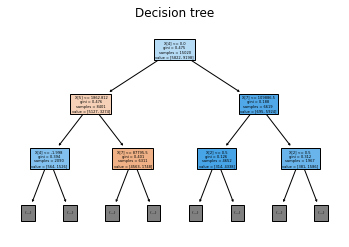

time: 508 ms (started: 2022-05-09 19:11:27 +05:30)


In [60]:
#Plotting Decision Tree
plt.figure()
plot_tree(classifier, filled=True, max_depth=2)
plt.title("Decision tree")
plt.show()

In [61]:
#Creating DataFrame
report = classification_report(y_test,y_DTpredict, output_dict=True)
df_DT = pd.DataFrame(report).T

time: 16.4 ms (started: 2022-05-09 19:11:30 +05:30)


In [62]:
#Resetting & renaming index
df_DT.reset_index(level=0, inplace=True)
df_DT.rename({'index': 'Decision Tree Classifier'}, axis=1, inplace=True)
df_DT

,Decision Tree Classifier,precision,recall,f1-score,support
0,0,0.793175,0.801548,0.797340,1421.000000
1,1,0.878448,0.872805,0.875618,2335.000000
2,accuracy,0.845847,0.845847,0.845847,0.845847
3,macro avg,0.835812,0.837177,0.836479,3756.000000
4,weighted avg,0.846187,0.845847,0.846003,3756.000000


time: 14.2 ms (started: 2022-05-09 19:11:31 +05:30)


## Decision Tree Using Entropy

In [58]:
#Fitting Decision Tree classifier using entropy to the training set  
Eclassifier= DecisionTreeClassifier(max_depth=50, max_leaf_nodes= 10,criterion='entropy', random_state=0)  
Eclassifier.fit(X_train, y_train)  

DecisionTreeClassifier(criterion='entropy', max_depth=50, max_leaf_nodes=10,
                       random_state=0)

time: 68 ms (started: 2022-05-10 11:34:07 +05:30)


In [59]:
#Predicting the test set result  
y_DTpred= Eclassifier.predict(X_test)  

time: 5.1 ms (started: 2022-05-10 11:34:07 +05:30)


In [101]:
Predict_Test_Label['default_payment_next_month'] = y_DTpred
Predict_Test_Label.to_csv("Labels_DTE10.csv")

time: 20.7 ms (started: 2022-05-09 18:08:20 +05:30)


In [61]:
#Evaluating the algorithm
print(confusion_matrix(y_test,y_DTpred))
print("Testing Accuracy score:",accuracy_score(y_test, y_DTpred))
print("ROC Score:",roc_auc_score(y_test, y_DTpredict))
print(classification_report(y_test,y_DTpred))

[[1214  268]
 [ 442 1817]]
Testing Accuracy score: 0.810211173483026
ROC Score: 0.8319909744736752
              precision    recall  f1-score   support

           0       0.73      0.82      0.77      1482
           1       0.87      0.80      0.84      2259

    accuracy                           0.81      3741
   macro avg       0.80      0.81      0.81      3741
weighted avg       0.82      0.81      0.81      3741

time: 19.4 ms (started: 2022-05-10 11:34:13 +05:30)


<AxesSubplot:>

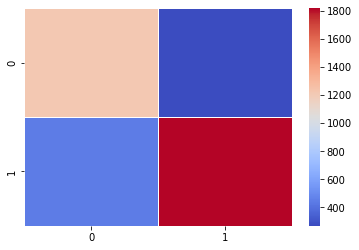

time: 190 ms (started: 2022-05-10 11:34:28 +05:30)


In [62]:
#Heat map of confusion_matrix
cm = confusion_matrix(y_test, y_DTpred)
sns.heatmap(cm,linewidths=1,cmap='coolwarm')

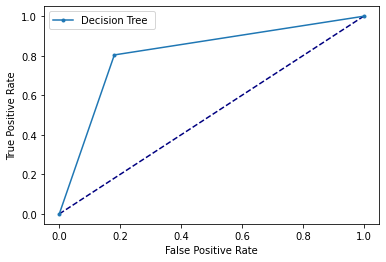

time: 143 ms (started: 2022-05-10 11:34:30 +05:30)


In [63]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
lr_probs = Eclassifier.predict(X_test)
# keeping probabilities for the positive outcome only
#lr_probs = lr_probs[:, 1]
#print(lr_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot([0, 1], [0, 1], color="navy",linestyle="--")
plt.plot(fpr, tpr, marker='.', label='Decision Tree ')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

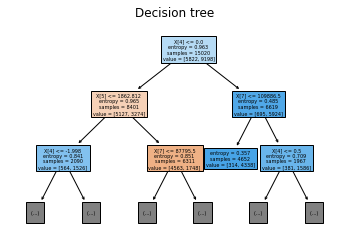

time: 466 ms (started: 2022-05-09 19:16:35 +05:30)


In [83]:
#Plotting Decision Tree using entropy 
plt.figure()
plot_tree(Eclassifier, filled=True, max_depth=2)
plt.title("Decision tree")
plt.show()

In [84]:
#Creating DataFrame
report = classification_report(y_test,y_DTpred, output_dict=True)
df_DTE = pd.DataFrame(report).T
df_DTE.reset_index(level=0, inplace=True)
df_DTE.rename({'index': 'Decision Tree(Entropy) Classifier'}, axis=1, inplace=True)
df_DTE

,Decision Tree(Entropy) Classifier,precision,recall,f1-score,support
0,0,0.704768,0.811400,0.754334,1421.000000
1,1,0.873585,0.793148,0.831425,2335.000000
2,accuracy,0.800053,0.800053,0.800053,0.800053
3,macro avg,0.789176,0.802274,0.792880,3756.000000
4,weighted avg,0.809717,0.800053,0.802260,3756.000000


time: 22.9 ms (started: 2022-05-09 19:16:36 +05:30)


## KNN

Minimum error:- 0.16613418530351437 at K = 0


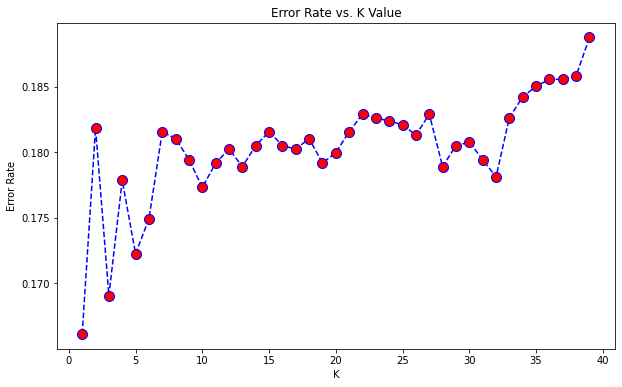

time: 40.7 s (started: 2022-05-09 19:12:10 +05:30)


In [71]:
#Finding Minimum error rate at k-value and plotting the graph
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_std,y_train)
    pred_i = knn.predict(X_test_std)
    error_rate.append(np.mean(pred_i != y_test))
#Plotting the graph
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

Maximum accuracy:- 0.8338658146964856 at K = 0


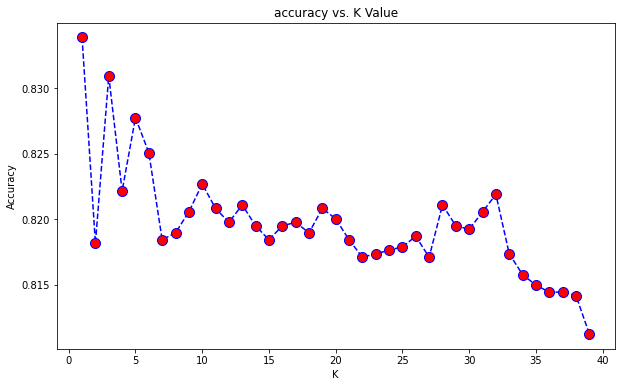

time: 40.7 s (started: 2022-05-09 19:13:55 +05:30)


In [72]:
#Finding highest accuracy rate at k-value and plotting the graph
acc = []
from sklearn import metrics
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i,).fit(X_train_std,y_train)
    yhat = neigh.predict(X_test_std)
    acc.append(metrics.accuracy_score(y_test, yhat))
#PLotting the graph    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

In [74]:
#Getting k values Accuracy
from sklearn import metrics
Accuracy = []
for i in range(1,8):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train_std,y_train)
    pred = neigh.predict(X_test_std)
    Accuracy = metrics.accuracy_score(y_test, pred)
    print('K-Value{}: {}' .format(i,Accuracy))

K-Value1: 0.8338658146964856
K-Value2: 0.8181576144834931
K-Value3: 0.830937167199148
K-Value4: 0.8221512247071352
K-Value5: 0.8277422790202343
K-Value6: 0.8250798722044729
K-Value7: 0.8184238551650692
time: 6.97 s (started: 2022-05-09 19:15:01 +05:30)


In [75]:
#Fitting K-NN classifier to the training set  
KNNclassifier= KNeighborsClassifier(n_neighbors=3)  
KNNclassifier.fit(X_train_std, y_train)  

KNeighborsClassifier(n_neighbors=3)

time: 6.21 ms (started: 2022-05-09 19:15:30 +05:30)


In [76]:
#Predicting the test set result  
y_KNNpred= KNNclassifier.predict(X_test_std)  

time: 954 ms (started: 2022-05-09 19:15:31 +05:30)


In [77]:
#Evaluating the algorithm
print(confusion_matrix(y_test,y_KNNpred))
print("Testing Accuracy score:",accuracy_score(y_test, y_KNNpred))
print(classification_report(y_test,y_KNNpred))

[[1043  378]
 [ 257 2078]]
Testing Accuracy score: 0.830937167199148
              precision    recall  f1-score   support

           0       0.80      0.73      0.77      1421
           1       0.85      0.89      0.87      2335

    accuracy                           0.83      3756
   macro avg       0.82      0.81      0.82      3756
weighted avg       0.83      0.83      0.83      3756

time: 12.3 ms (started: 2022-05-09 19:15:32 +05:30)


<AxesSubplot:>

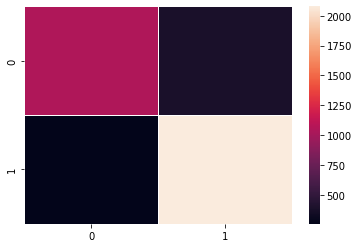

time: 137 ms (started: 2022-05-09 19:15:41 +05:30)


In [78]:
#Heat map of confusion_matrix
cm = confusion_matrix(y_test, y_KNNpred)
sns.heatmap(cm,linewidths=1)

In [79]:
report = classification_report(y_test,y_KNNpred, output_dict=True)
df_KNN = pd.DataFrame(report).T

time: 11.1 ms (started: 2022-05-09 19:15:43 +05:30)


In [80]:
df_KNN.reset_index(level=0, inplace=True)
df_KNN.rename({'index': 'KNN Classifier'}, axis=1, inplace=True)
df_KNN

,KNN Classifier,precision,recall,f1-score,support
0,0,0.802308,0.733990,0.766630,1421.000000
1,1,0.846091,0.889936,0.867460,2335.000000
2,accuracy,0.830937,0.830937,0.830937,0.830937
3,macro avg,0.824199,0.811963,0.817045,3756.000000
4,weighted avg,0.829527,0.830937,0.829313,3756.000000


time: 17.6 ms (started: 2022-05-09 19:15:44 +05:30)


## Naive Bayes

In [68]:
# Fitting Naive Bayes to the Training set  
from sklearn.naive_bayes import GaussianNB  
nb = GaussianNB()  
nb.fit(X_train_std, y_train)  

GaussianNB()

time: 6.45 ms (started: 2022-05-10 12:01:37 +05:30)


In [69]:
# Predicting the Test set results  
y_predNB = nb.predict(X_test_std)  

time: 2.8 ms (started: 2022-05-10 12:01:39 +05:30)


In [71]:
#Evaluating the algorithm
print(confusion_matrix(y_test,y_predNB))
print("Testing Accuracy score:",accuracy_score(y_test, y_predNB))
print("ROC Score:",roc_auc_score(y_test, y_predNB) )
print(classification_report(y_test,y_predNB))

[[ 350 1132]
 [  94 2165]]
Testing Accuracy score: 0.6722801390002673
ROC Score: 0.5972780044912567
              precision    recall  f1-score   support

           0       0.79      0.24      0.36      1482
           1       0.66      0.96      0.78      2259

    accuracy                           0.67      3741
   macro avg       0.72      0.60      0.57      3741
weighted avg       0.71      0.67      0.61      3741

time: 14 ms (started: 2022-05-10 12:01:46 +05:30)


<AxesSubplot:>

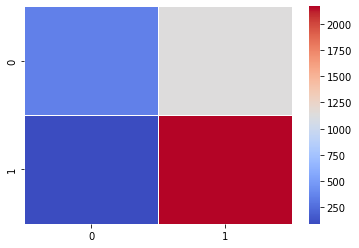

time: 138 ms (started: 2022-05-10 12:02:10 +05:30)


In [73]:
#Heat map of confusion_matrix
cm = confusion_matrix(y_test, y_predNB)
sns.heatmap(cm,linewidths=1, cmap='coolwarm')

In [74]:
#Creating DataFrame
report = classification_report(y_test,y_predNB, output_dict=True)
df_NB = pd.DataFrame(report).T

time: 17.2 ms (started: 2022-05-10 12:02:16 +05:30)


In [75]:
#Resetting & renaming index
df_NB.reset_index(level=0, inplace=True)
df_NB.rename({'index': 'Naive Bayes Classifier'}, axis=1, inplace=True)
df_NB

,Naive Bayes Classifier,precision,recall,f1-score,support
0,0,0.788288,0.236167,0.363448,1482.00000
1,1,0.656658,0.958389,0.779338,2259.00000
2,accuracy,0.672280,0.672280,0.672280,0.67228
3,macro avg,0.722473,0.597278,0.571393,3741.00000
4,weighted avg,0.708803,0.672280,0.614582,3741.00000


time: 12.2 ms (started: 2022-05-10 12:02:17 +05:30)


## Random Forest

In [84]:
from sklearn.ensemble import RandomForestClassifier

time: 339 µs (started: 2022-05-12 16:44:37 +05:30)


In [55]:
rf = RandomForestClassifier(criterion='entropy',random_state=0,max_depth=20, min_samples_leaf=5)

time: 600 µs (started: 2022-05-10 15:33:27 +05:30)


In [51]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

time: 831 µs (started: 2022-05-10 15:30:23 +05:30)


In [52]:
from sklearn.model_selection import GridSearchCV
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

time: 848 µs (started: 2022-05-10 15:30:25 +05:30)


In [53]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits
CPU times: user 3.71 s, sys: 146 ms, total: 3.86 s
Wall time: 2min 24s


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(criterion='entropy',
                                              random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

time: 2min 24s (started: 2022-05-10 15:30:27 +05:30)


In [54]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(criterion='entropy', max_depth=20, min_samples_leaf=5,
                       random_state=0)

time: 4.33 ms (started: 2022-05-10 15:33:08 +05:30)


In [85]:
classifier_rf = RandomForestClassifier(criterion='entropy', max_depth=80 ,max_leaf_nodes=20,random_state=42,max_features=6)

time: 517 µs (started: 2022-05-12 16:44:43 +05:30)


In [42]:
X_train.shape

(14082, 17)

time: 3.42 ms (started: 2022-05-11 11:24:18 +05:30)


In [86]:
classifier_rf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=80, max_features=6,
                       max_leaf_nodes=20, random_state=42)

time: 1.92 s (started: 2022-05-12 16:44:48 +05:30)


In [41]:
X.shape

(21000, 17)

time: 1.82 ms (started: 2022-05-10 17:14:53 +05:30)


In [44]:
y_predrf= classifier_rf.predict(X_test)  
y_predrf.shape

(4694,)

time: 48.9 ms (started: 2022-05-11 11:24:49 +05:30)


In [87]:
y_predrf= classifier_rf.predict_proba(Test_data)[:,1]

time: 72.9 ms (started: 2022-05-12 16:44:55 +05:30)


In [88]:
Test_Label=pd.DataFrame()
Test_Label['ID'] = Test_data['ID']
Test_Label.shape

(9000, 1)

time: 3.76 ms (started: 2022-05-12 16:44:56 +05:30)


In [89]:
Test_Label['default_payment_next_month'] = y_predrf
Test_Label.to_csv("Test_Label_RF8.csv")

time: 26.9 ms (started: 2022-05-12 16:45:02 +05:30)


In [45]:
Test_Label.shape

(9000, 2)

time: 1.88 ms (started: 2022-05-10 17:15:10 +05:30)


In [45]:
#Evaluating the algorithm
print(confusion_matrix(y_test,y_predrf))
print("Testing Accuracy score:",accuracy_score(y_test, y_predrf))
print("ROC Score:",roc_auc_score(y_test, y_predrf) )
print(classification_report(y_test,y_predrf))

[[1376  398]
 [ 367 2553]]
Testing Accuracy score: 0.8370259906263315
ROC Score: 0.8249816605148955
              precision    recall  f1-score   support

           0       0.79      0.78      0.78      1774
           1       0.87      0.87      0.87      2920

    accuracy                           0.84      4694
   macro avg       0.83      0.82      0.83      4694
weighted avg       0.84      0.84      0.84      4694

time: 249 ms (started: 2022-05-11 11:24:54 +05:30)


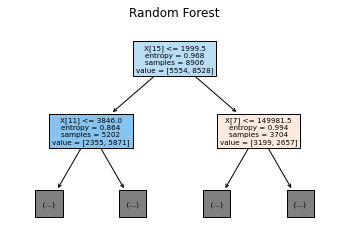

time: 302 ms (started: 2022-05-10 16:05:03 +05:30)


In [100]:
#Plotting Random Forest
plt.figure()
plot_tree(classifier_rf.estimators_[0], filled=True, max_depth=1)
plt.title("Random Forest")
plt.show()

In [89]:
#Creating DataFrame
report = classification_report(y_test,y_predrf, output_dict=True)
df_RF = pd.DataFrame(report).T

time: 15.6 ms (started: 2022-05-10 12:21:54 +05:30)


In [90]:
#Resetting & renaming index
df_RF.reset_index(level=0, inplace=True)
df_RF.rename({'index': 'Random Forest Classifier'}, axis=1, inplace=True)
df_RF

,Random Forest Classifier,precision,recall,f1-score,support
0,0,0.846797,0.820513,0.833448,1482.000000
1,1,0.884599,0.902612,0.893514,2259.000000
2,accuracy,0.870088,0.870088,0.870088,0.870088
3,macro avg,0.865698,0.861562,0.863481,3741.000000
4,weighted avg,0.869623,0.870088,0.869719,3741.000000


time: 12 ms (started: 2022-05-10 12:21:55 +05:30)


## GBM

In [90]:
from sklearn.ensemble import GradientBoostingClassifier
model_gbm= GradientBoostingClassifier(learning_rate=0.01,random_state=0,loss='exponential',init='zero',validation_fraction=0.05)
model_gbm.fit(X_train, y_train)

GradientBoostingClassifier(init='zero', learning_rate=0.01, loss='exponential',
                           random_state=0, validation_fraction=0.05)

time: 3.42 s (started: 2022-05-12 16:45:12 +05:30)


In [117]:
y_predict_GBM= model_gbm.predict(X_test)  

time: 11.5 ms (started: 2022-05-12 15:17:55 +05:30)


In [91]:
y_predict_GBM= model_gbm.predict_proba(Test_data)[:,1]

time: 18.3 ms (started: 2022-05-12 16:45:25 +05:30)


In [92]:
Test_Label=pd.DataFrame()
Test_Label['ID'] = Test_data['ID']

time: 2.89 ms (started: 2022-05-12 16:45:47 +05:30)


In [93]:
Test_Label['default_payment_next_month'] = y_predict_GBM
Test_Label.to_csv("Test_Label_GBM1.csv")

time: 27.8 ms (started: 2022-05-12 16:45:52 +05:30)


In [118]:
#Evaluating the algorithm
print(confusion_matrix(y_test,y_predict_GBM))
print("Testing Accuracy score:",accuracy_score(y_test, y_predict_GBM))
print("ROC Score:",roc_auc_score(y_test, y_predict_GBM) )
print(classification_report(y_test,y_predict_GBM))

[[1419  355]
 [ 555 2365]]
Testing Accuracy score: 0.8061354921175969
ROC Score: 0.8049093836388628
              precision    recall  f1-score   support

           0       0.72      0.80      0.76      1774
           1       0.87      0.81      0.84      2920

    accuracy                           0.81      4694
   macro avg       0.79      0.80      0.80      4694
weighted avg       0.81      0.81      0.81      4694

time: 13.2 ms (started: 2022-05-12 15:17:59 +05:30)


<AxesSubplot:>

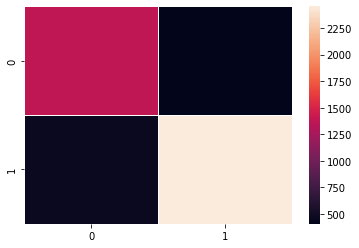

time: 146 ms (started: 2022-05-11 16:08:43 +05:30)


In [57]:
#Heat map of confusion_matrix
cm = confusion_matrix(y_test, y_predict_GBM)
sns.heatmap(cm,linewidths=1)

In [62]:
#Creating DataFrame
report = classification_report(y_test,y_predict_GBM, output_dict=True)
df_GBM = pd.DataFrame(report).T

time: 17.6 ms (started: 2022-05-11 16:10:22 +05:30)


In [63]:
#Resetting & renaming index
df_GBM.reset_index(level=0, inplace=True)
df_GBM.rename({'index': 'Gradient Boosting Classifier'}, axis=1, inplace=True)
df_GBM

,Gradient Boosting Classifier,precision,recall,f1-score,support
0,0,0.745772,0.770575,0.757971,1774.000000
1,1,0.857742,0.840411,0.848988,2920.000000
2,accuracy,0.814018,0.814018,0.814018,0.814018
3,macro avg,0.801757,0.805493,0.803479,4694.000000
4,weighted avg,0.815425,0.814018,0.814590,4694.000000


time: 10.9 ms (started: 2022-05-11 16:10:23 +05:30)


## XGBoost

In [43]:
import xgboost as xgb
model_xgb=xgb.XGBClassifier(sampling_method= 'gradient_based', random_state=0,learning_rate=0.05,max_depth=3,base_score=0.3)
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.3, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

time: 633 ms (started: 2022-05-13 10:42:07 +05:30)


In [51]:
y_predict_xgb= model_xgb.predict_proba(Test_data)
#y_predict_xgb = np.round(y_predict_xgb)
#y_predict_xgb = np.where(y_predict_xgb>0.5, 1, 0)
#y_predict_xgb = np.argmax(y_predict_xgb, axis=1)
df = pd.DataFrame(y_predict_xgb)
df

,0,1
0,0.627505,0.372495
1,0.546178,0.453823
2,0.695548,0.304452
3,0.830430,0.169570
4,0.836235,0.163765
...,...,...
8995,0.393235,0.606765
8996,0.679623,0.320377
8997,0.634387,0.365613
8998,0.668435,0.331565


time: 28.2 ms (started: 2022-05-13 10:45:12 +05:30)


In [72]:
df1 = pd.DataFrame(y_predict_xgbT)
df1.rename(columns = {0:'y_test_pred'}, inplace = True)
df1

,y_test_pred
0,0
1,0
2,0
3,0
4,0
...,...
8995,1
8996,0
8997,0
8998,0


time: 7.87 ms (started: 2022-05-13 11:19:10 +05:30)


In [156]:
y_predict_xgb= model_xgb.predict_proba(X_test)[:, 1]

time: 27 ms (started: 2022-05-12 17:35:43 +05:30)


In [60]:
plt.plot(fpr, tpr, linestyle='--',color='green', label='XGBoost')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')


plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

NameError: name 'fpr' is not defined

time: 10.1 ms (started: 2022-05-12 18:00:03 +05:30)


In [75]:
data = pd.concat([df, df1], axis=1)
data.rename(columns = {0:'Non-Defaulters', 1:'Defaulters'}, inplace = True)
data

,Non-Defaulters,Defaulters,y_test_pred
0,0.627505,0.372495,0
1,0.546178,0.453823,0
2,0.695548,0.304452,0
3,0.830430,0.169570,0
4,0.836235,0.163765,0
...,...,...,...
8995,0.393235,0.606765,1
8996,0.679623,0.320377,0
8997,0.634387,0.365613,0
8998,0.668435,0.331565,0


time: 12.3 ms (started: 2022-05-13 11:21:44 +05:30)


In [53]:
y_predict_xgbT= model_xgb.predict(Test_data)

time: 24 ms (started: 2022-05-13 10:49:25 +05:30)


In [49]:
Test_Label=pd.DataFrame()
Test_Label['ID'] = Test_data['ID']

time: 3.94 ms (started: 2022-05-13 10:44:36 +05:30)


In [84]:
Test_Label['default_payment_next_month'] = y_predict_xgb['Non-Defaulters', 'Defaulters']
Test_Label.to_csv("Test_Label_XGB1.csv")

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

time: 8.71 ms (started: 2022-05-13 11:27:02 +05:30)


In [61]:
#Evaluating the algorithm
print(confusion_matrix(y_test,y_predict_xgb))
print("Testing Accuracy score:",accuracy_score(y_test, y_predict_xgb))
print("ROC Score:",roc_auc_score(y_test, y_predict_xgb) )
print(classification_report(y_test,y_predict_xgb))

[[1449  325]
 [ 616 2304]]
Testing Accuracy score: 0.7995313165743503
ROC Score: 0.8029196460286327
              precision    recall  f1-score   support

           0       0.70      0.82      0.75      1774
           1       0.88      0.79      0.83      2920

    accuracy                           0.80      4694
   macro avg       0.79      0.80      0.79      4694
weighted avg       0.81      0.80      0.80      4694

time: 24.7 ms (started: 2022-05-12 18:00:16 +05:30)


In [117]:
# define thresholds
thresholds = np.arange(0, 1, 0.001)

time: 572 µs (started: 2022-05-12 17:15:47 +05:30)


In [118]:
# apply threshold to positive probabilities to create labels
def to_labels(pos_probs, threshold):
    return (pos_probs >= threshold).astype('int')


time: 366 µs (started: 2022-05-12 17:15:48 +05:30)


In [119]:
from sklearn.metrics import f1_score
# evaluate each threshold
scores = [f1_score(y_test, to_labels(y_predict_xgb, t)) for t in thresholds]

time: 1.83 s (started: 2022-05-12 17:15:49 +05:30)


In [121]:
# get best threshold
ix = np.argmax(scores)
print('Threshold=%.3f, F-Score=%.5f' % (thresholds[ix], scores[ix]))

Threshold=0.416, F-Score=0.88619
time: 1.07 ms (started: 2022-05-12 17:16:33 +05:30)


In [64]:
def Accuracy_Model_score_Mergedcols():
    
    """
    printing Classification_Report DataFrames of all the models
    
    """
    
    print(df_DT)
    print(df_KNN)
    print(df_LR)
    print(df_SVM)
    print(df_DTE)
    print(df_NB)
    print(df_RF)
    print(df_GBM)
   

time: 670 µs (started: 2022-05-11 16:10:40 +05:30)


In [96]:
Accuracy_Model_score_Mergedcols()

  Decision Tree Classifier  precision    recall  f1-score      support
0                        0   0.793175  0.801548  0.797340  1421.000000
1                        1   0.878448  0.872805  0.875618  2335.000000
2                 accuracy   0.845847  0.845847  0.845847     0.845847
3                macro avg   0.835812  0.837177  0.836479  3756.000000
4             weighted avg   0.846187  0.845847  0.846003  3756.000000
  KNN Classifier  precision    recall  f1-score      support
0              0   0.802308  0.733990  0.766630  1421.000000
1              1   0.846091  0.889936  0.867460  2335.000000
2       accuracy   0.830937  0.830937  0.830937     0.830937
3      macro avg   0.824199  0.811963  0.817045  3756.000000
4   weighted avg   0.829527  0.830937  0.829313  3756.000000
  Logistic Regression Classifier  precision    recall  f1-score      support
0                              0   0.742254  0.741731  0.741992  1421.000000
1                              1   0.842894  0.843255 

In [49]:
#Predicted Data of RF Model
data1 = pd.read_csv("Test_Label_RF6.csv")

time: 5.56 ms (started: 2022-05-11 11:28:02 +05:30)


/home/rutvathaker/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.2, 'Value counts: \n0    5228\n1    3772\nName: default_payment_next_month, dtype: int64')

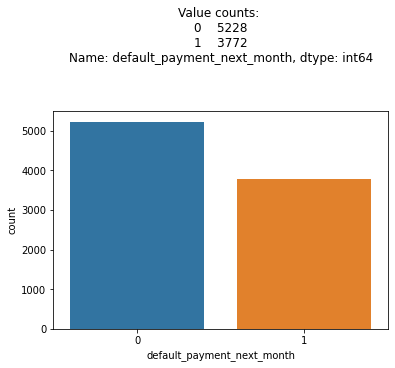

time: 87.9 ms (started: 2022-05-11 11:28:15 +05:30)


In [51]:
#CountPlot of predicted Model(RF)
sns.countplot(data1['default_payment_next_month'])
plt.title('Value counts: \n{}'.format(data1['default_payment_next_month'].value_counts()), x=0.5, y=1.20, ha='center')

In [148]:
#Predicted Data of DT Model
data = pd.read_csv("Test_Label_GBM1.csv")

time: 6.69 ms (started: 2022-05-12 17:26:19 +05:30)


/home/rutvathaker/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.2, 'Value counts: \n0.274419    556\n0.297115    471\n0.295699    381\n0.319380    329\n0.658335    149\n           ... \n0.392336      1\n0.415540      1\n0.405659      1\n0.307922      1\n0.399089      1\nName: default_payment_next_month, Length: 1848, dtype: int64')

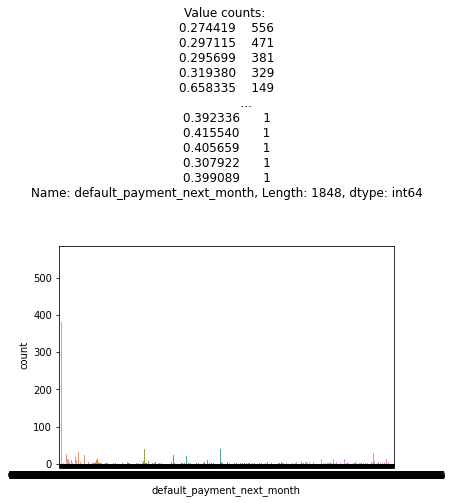

time: 17.9 s (started: 2022-05-12 17:26:21 +05:30)


In [149]:
#CountPlot of predicted Model(DT)
sns.countplot(data['default_payment_next_month'])
plt.title('Value counts: \n{}'.format(data['default_payment_next_month'].value_counts()), x=0.5, y=1.20, ha='center')

/home/rutvathaker/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.2, 'Value counts: \n0    16355\n1     4645\nName: default_payment_next_month, dtype: int64')

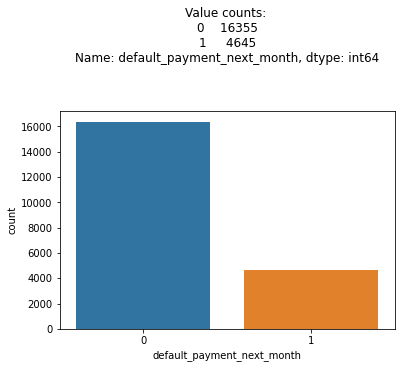

time: 145 ms (started: 2022-05-10 10:53:58 +05:30)


In [5]:
sns.countplot(Train_data['default_payment_next_month'])
plt.title('Value counts: \n{}'.format(Train_data['default_payment_next_month'].value_counts()), x=0.5, y=1.20, ha='center')